<a href="https://colab.research.google.com/github/Deepikagh97/HEALTH_INSURANCE_CROSS_SELL_PREDICTION/blob/main/DN_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEALTH INSURANCE CROSS SELL PREDICTION**

### **Project Type - End to End Machine Learning(Classification)**
### **Contribution - Individual - Deepika Nayak**

### **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### **Attribute Information**

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License: 0 - Customer does not have DL, 1 - Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 - Customer already has Vehicle Insurance, 0 - Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage :1 - Customer got his/her vehicle damaged in the past. 0 - Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 - Customer is interested, 0 - Customer is not interested

## **Let's Start The Project**

#### **Importing Libraries**

In [ ]:
# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Models
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression


# Evaluation Metrics
import sklearn
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import randint as sp_randint
from imblearn.over_sampling import SMOTE

# Miscellaneous
import time
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

*Let's read the dataset we have to work on! We have a dataset of Health Insurance details.*

In [ ]:
# uploading the dataset
data=pd.read_csv("TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

####**Let's deep dive into the dataset**

In [ ]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


The first 5 rows of the dataset

In [ ]:
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


The Last 5 rows

In [ ]:
# Dataset Rows & Columns count
data.shape

(381109, 12)

There are 12 columns, 381109 rows in the dataset

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


From the above dataset information,There are 12 columns, 9 columns are integer and float types and 3 columns are of object types.

**Understanding statistical data summaries**

In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109.0,NaN,NaN,NaN,190555.0,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109.0,NaN,NaN,NaN,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,NaN,NaN,NaN,0.997869,0.04611,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,NaN,NaN,NaN,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,NaN,NaN,NaN,0.45821,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109.0,NaN,NaN,NaN,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,NaN,NaN,NaN,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


In [ ]:
#checking for duplicate rows
print("dupilicate rows in the dataset : ",len(data[data.duplicated()]))
data.duplicated()

dupilicate rows in the dataset :  0


0         False
1         False
2         False
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107    False
381108    False
Length: 381109, dtype: bool

There are no duplicate rows in the dataset

**Checking for Missing Values/Null Values**

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no null/missing values in the dataset

### **Understanding Your Variables**

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Variables Description**

-We can observe from the age feature that the oldest insured client is 85 and the youngest is 20.

-The customer has a maximum of 299 days, a minimum of 10, and an average of 154 days associated with the company.

-The oldest customers in this dataset is 85 while the median is 36

-The maximum premium a client must pay in a year is 5,40,165 and the minimum premium client is paying is 2630, we may infer that most consumers are interested in modest premium amounts.

-The most expensive annual premium is almost 17 times more expensive compared to the median annual premium

In [ ]:
# Dataset Describe
data.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413




*   There are more male than female in this dataset.
*   Majority of the customer has a vehichle that's more than one year and less than two years.
*   Majority of the customer has a vehichle that's more than one year and less than two years.

**Check Unique Values for each variable**

In [ ]:
# Check Unique Values for each variable.
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

We may remove the Id column because the values in it are all unique.

In [ ]:
#deleting the ID row
data = data.drop('id', axis=1)

### **Data Wrangling**

In [ ]:
#code to make your dataset analysis ready.
data_desc = []
for column in data.columns:
  data_desc.append([column,
                  data[column].dtypes,
                  data[column].isnull().sum(),
                  round(data[column].isnull().sum()/len(data)*100, 2),
                  data[column].nunique(),
                  data[column].unique()])

## storing all the information in a single table just to keep it neat
column_desc = pd.DataFrame(data_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique
0,Gender,object,0,0.0,2,"[Male, Female]"
1,Age,int64,0,0.0,66,"[44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3..."
2,Driving_License,int64,0,0.0,2,"[1, 0]"
3,Region_Code,float64,0,0.0,53,"[28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,..."
4,Previously_Insured,int64,0,0.0,2,"[0, 1]"
5,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year, < 1 Year]"
6,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
7,Annual_Premium,float64,0,0.0,48838,"[40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ..."
8,Policy_Sales_Channel,float64,0,0.0,155,"[26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ..."
9,Vintage,int64,0,0.0,290,"[217, 183, 27, 203, 39, 176, 249, 72, 28, 80, ..."


In [ ]:
# find categorical and numerical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))


There are 3 categorical variables
There are 8 numerical variables


In [ ]:
# Creating Separate Dataframe for numerical features
data_numeric = data[['Age','Driving_License', 'Region_Code','Previously_Insured', 'Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Response']]

In [ ]:
data['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [ ]:
data['Response'] = data['Response'].astype(int)

In [ ]:
data['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [ ]:
# No. of Male and females in Gender feature
data['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Gender
Female    175020
Male      206089
Name: count, dtype: int64


VEHICLE_AGE :  3
Vehicle_Age
> 2 Years     16007
< 1 Year     164786
1-2 Year     200316
Name: count, dtype: int64


VEHICLE_DAMAGE :  2
Vehicle_Damage
No     188696
Yes    192413
Name: count, dtype: int64




In [ ]:
#creating age group
data['Age_Group'] = data['Age'].apply(lambda x:'Young_Age' if x >= 20 and x <=40 else 'Middle_Age' if x > 40 and x <= 60 else 'Old_Age')

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Middle_Age
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Old_Age
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Middle_Age
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Young_Age
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Young_Age


### **Finding distribution**

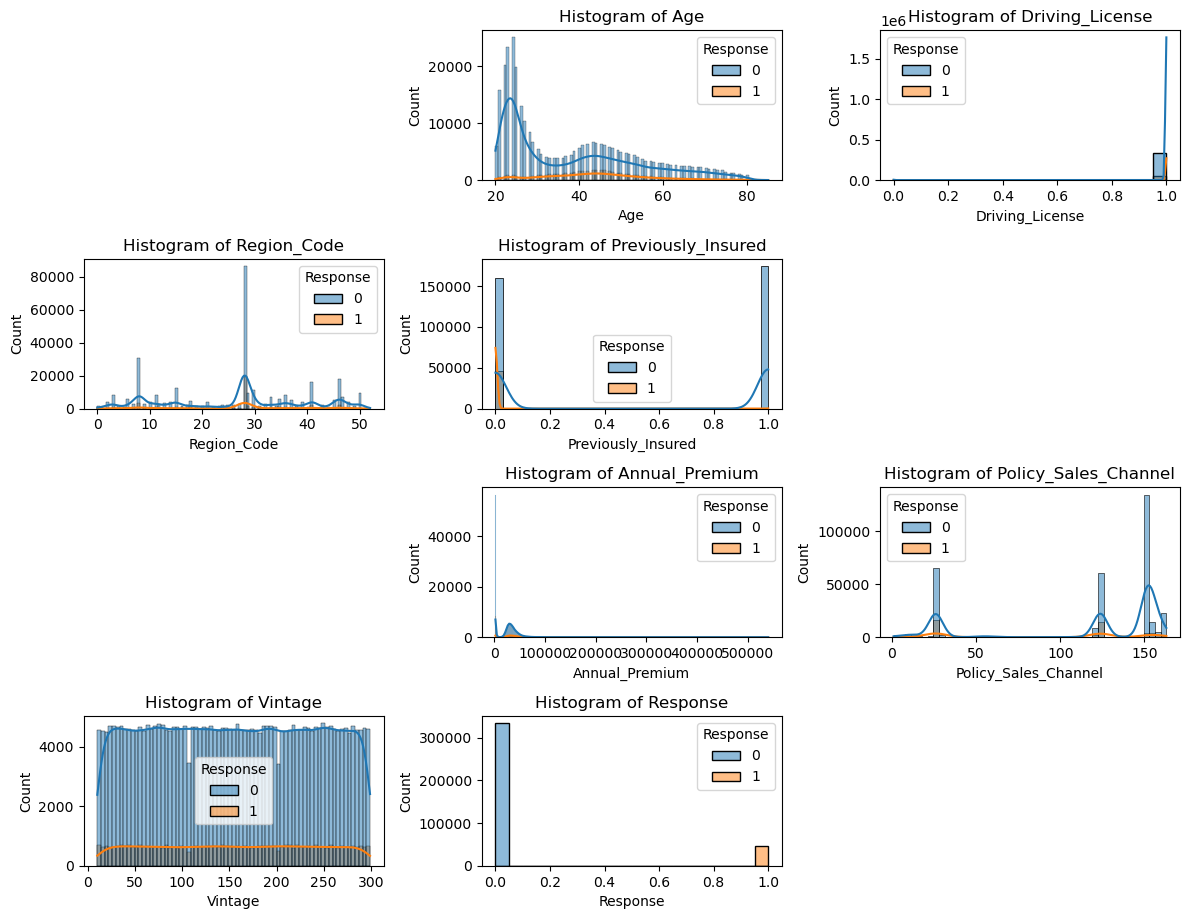

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,18))
feature_list = data.columns
for i in range(len(feature_list)):
    if data[feature_list[i]].dtype !='object':
        plt.subplot(8, 3, i + 1)
        sns.histplot(x = data[feature_list[i]], data = data, kde = True, hue = 'Response')
        plt.title('Histogram of {}'.format(feature_list[i]))
        plt.tight_layout()

<Figure size 1200x1800 with 0 Axes>

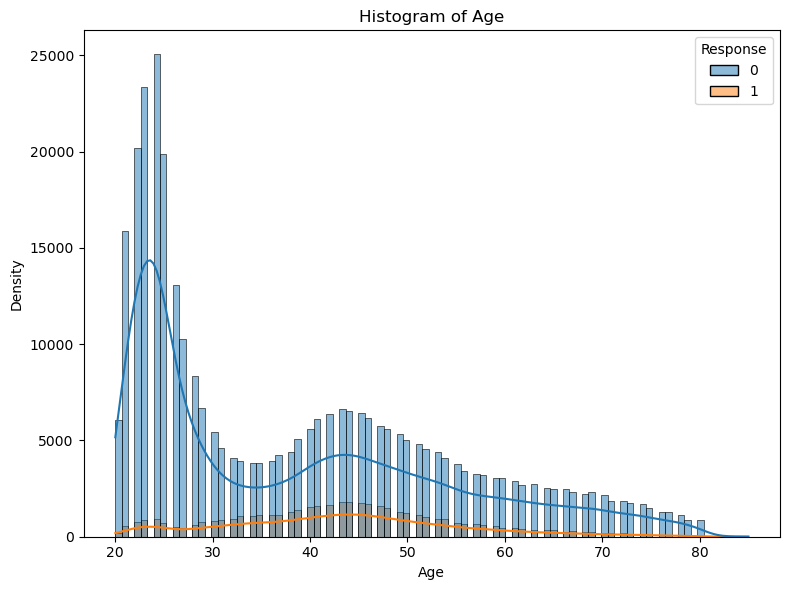

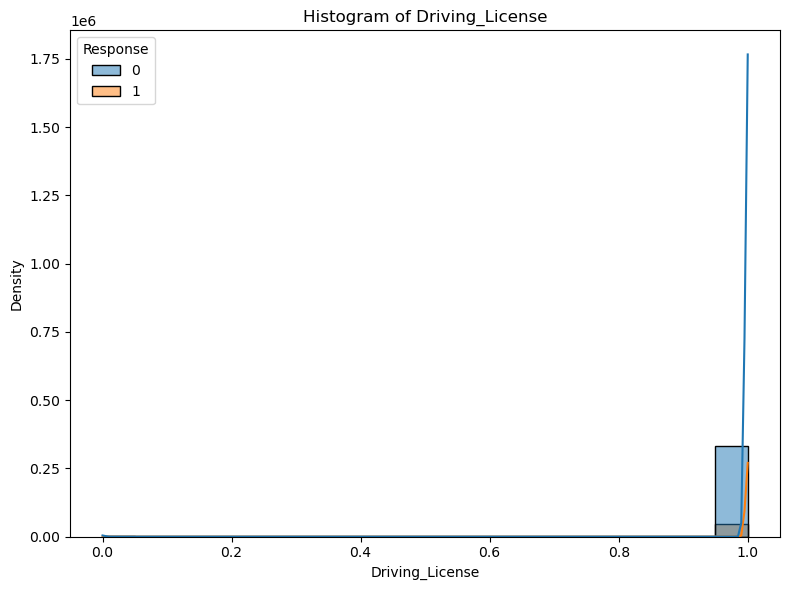

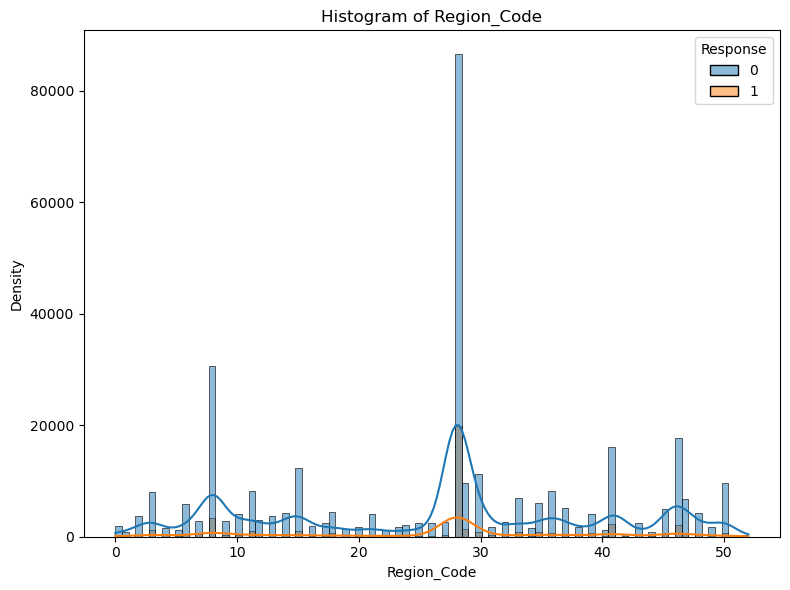

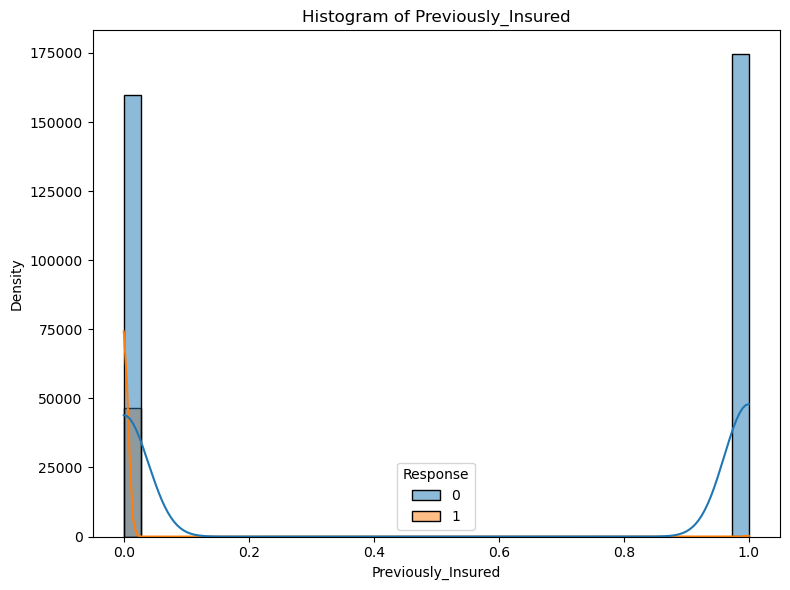

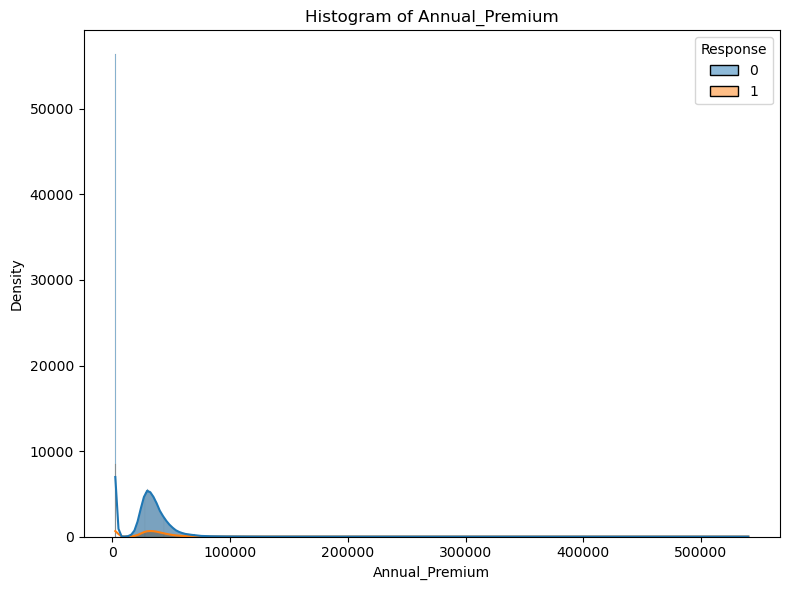

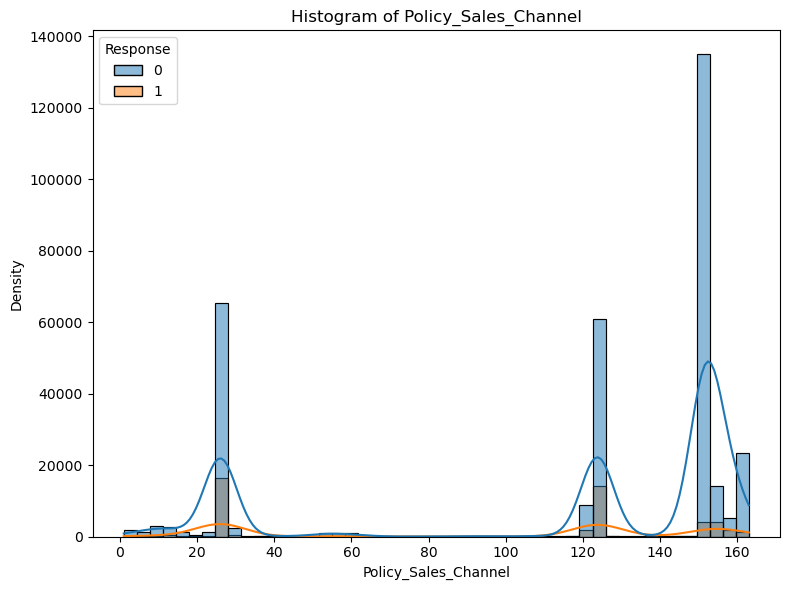

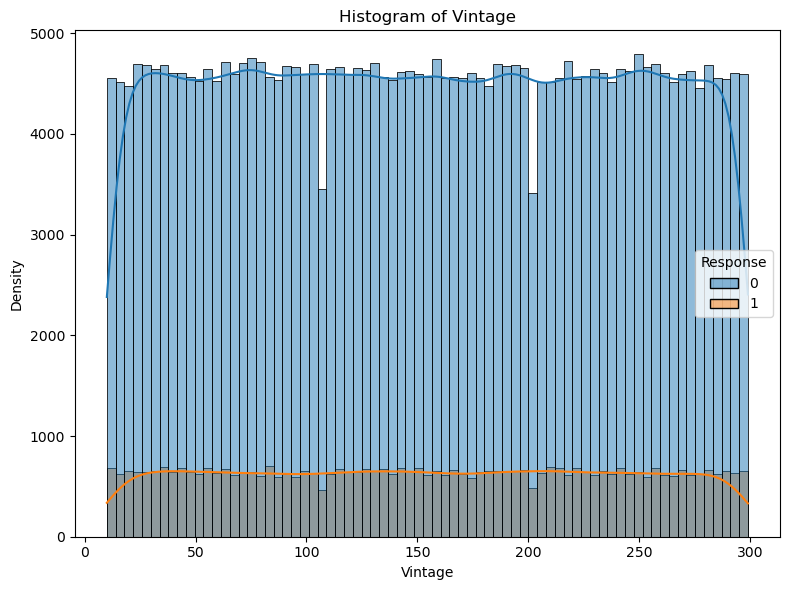

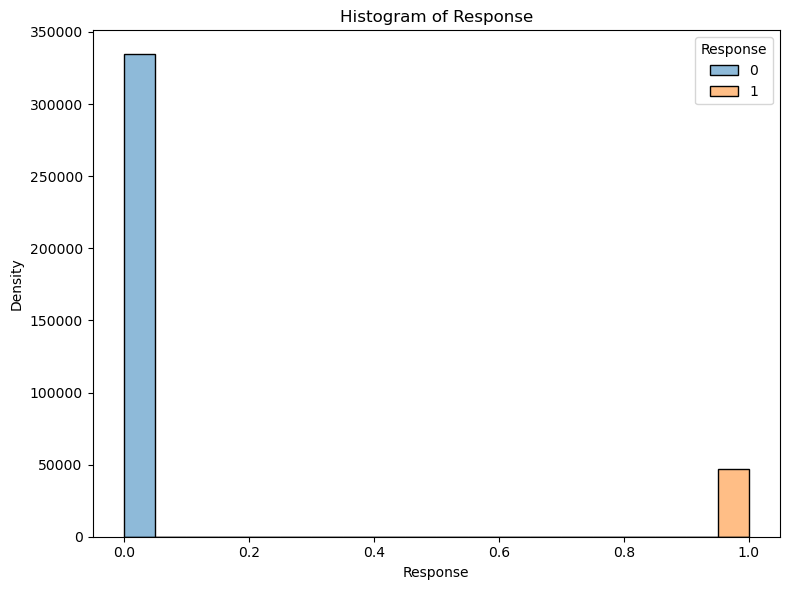

In [ ]:
plt.figure(figsize=(12, 18))
feature_list = data.columns

for feature in feature_list:
    if data[feature].dtype != 'object':
        plt.figure(figsize=(8, 6))  # Set individual plot size
        sns.histplot(x=data[feature], data=data, kde=True, hue='Response')
        plt.title('Histogram of {}'.format(feature))
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.tight_layout()  # Adjust layout
        plt.show()

Histogram of Age:
The age distribution is right-skewed, The peak density occurs at lower ages (around 20-30).
For both response categories, there is a peak in density at lower ages (around 20-30), which gradually decreases as age increases.

Histogram of Driving License:
Most individuals in the dataset have a driving license (labeled as ‘1’).
Only a very small number of individuals do not have a driving license (labeled as ‘0’).
The bar for response “1” (having a driving license) is significantly taller than the bar for response “0” (not having a driving license).

Histogram of Region Code:
The distribution of region codes shows that around region code 30 have higher representation in the dataset than others.
Some regions have significantly more data points, while others are less frequent.

Histogram of Previously Insured:
The histogram for previously insured customers indicates that a majority of individuals in the dataset have not been previously insured (labeled as ‘0’).
A smaller proportion of customers have been previously insured (labeled as ‘1’).
There is a large spike at the beginning (near 0) for “Response 0,” indicating a high density of individuals who were not previously insured.
A smaller spike is observed at the end (near 1) for “Response 1,” indicating a lower density of individuals who were previously insured.

Histogram of Annual Premium:
The annual premium distribution is right-skewed, with a few high-premium outliers.
Histograms for both Responses have a large spike near the lower end of the annual premium scale (around 0), indicating a high density of individuals with low annual premiums.

Histogram of Policy Sales Channel:
The policy sales channel distribution indicates that near the value of 160 channels are more commonly used for selling insurance policies.
Some channels have higher representation, while others are less frequent.

Histogram of Vehicle Age:
The distribution of vehicle ages shows that there are more data points for newer vehicles (‘< 1 Year’ and ‘1-2 Year’) compared to older vehicles (‘> 2 Years’).


Histogram of Vintage:
The vintage (number of days since the customer was associated with the company) distribution appears uniform.
There is no clear trend or pattern in the vintage data.

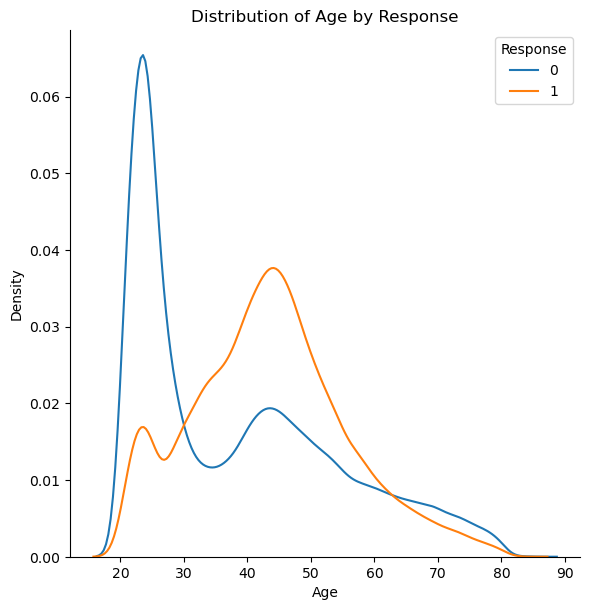

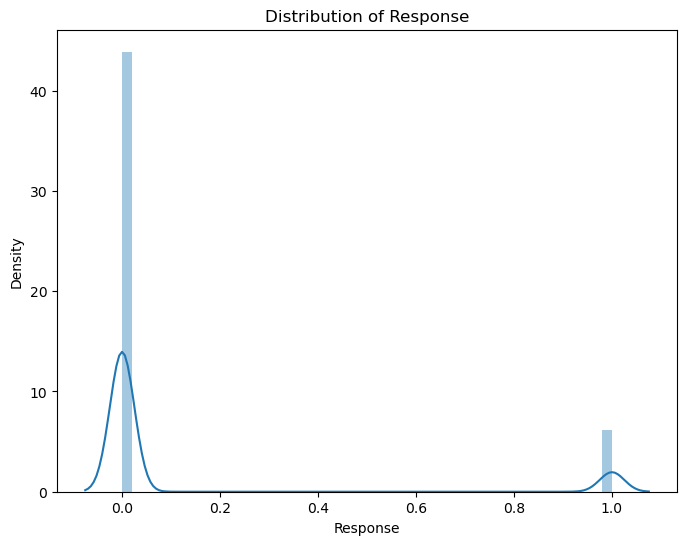

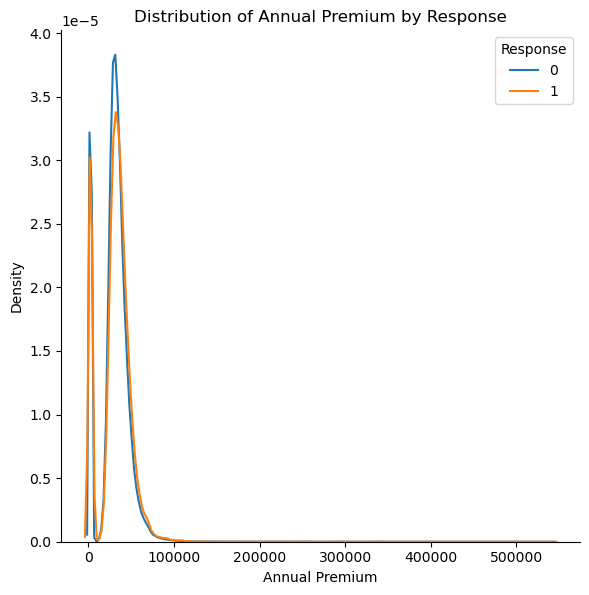

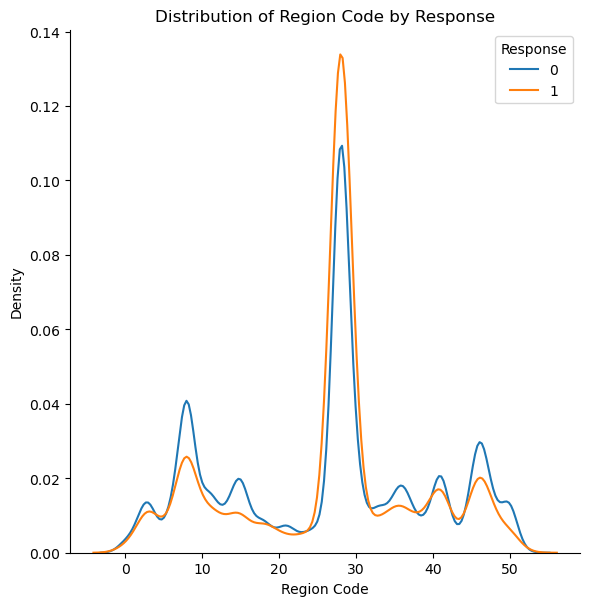

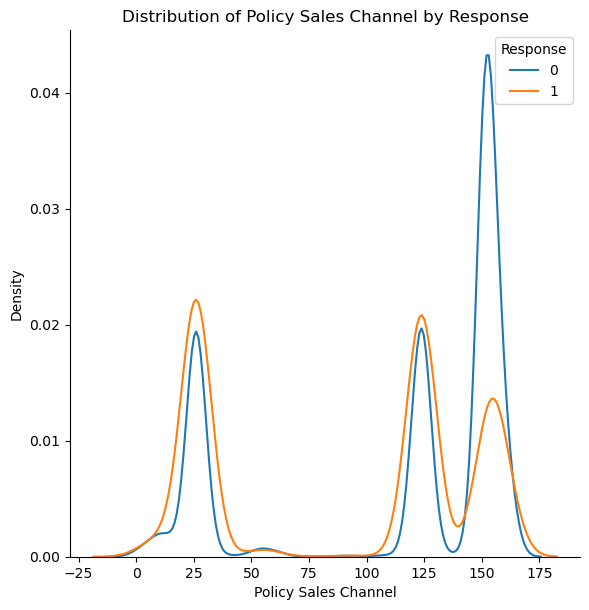

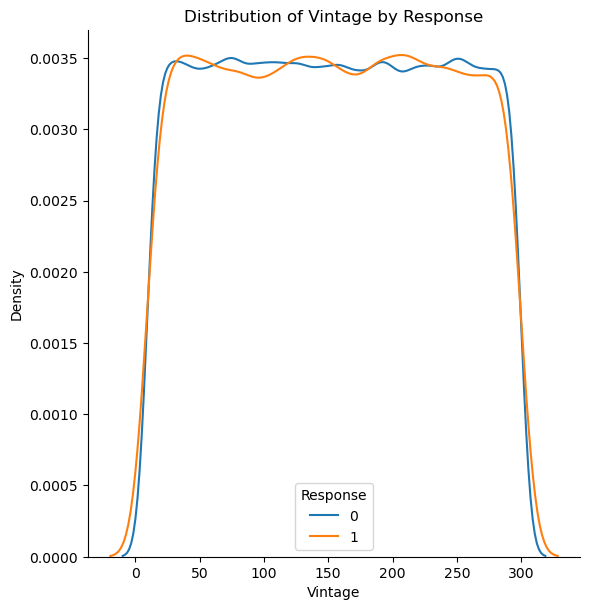

In [ ]:
# Displot of 'Age'
g = sns.FacetGrid(data, hue='Response', height=6)
g.map(sns.distplot, 'Age', hist=False, rug=False)
plt.title('Distribution of Age by Response')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Response')
plt.show()


# Displot of 'Response'
plt.figure(figsize=(8, 6))
sns.distplot(data['Response'])
plt.title('Distribution of Response')
plt.xlabel('Response')
plt.ylabel('Density')
plt.show()

# Displot of 'Annual_Premium'
g = sns.FacetGrid(data, hue='Response', height=6)
g.map(sns.distplot, 'Annual_Premium', hist=False, rug=False)
plt.title('Distribution of Annual Premium by Response')
plt.xlabel('Annual Premium')
plt.ylabel('Density')
plt.legend(title='Response')
plt.show()

# Displot of 'Region_Code'
g = sns.FacetGrid(data, hue='Response', height=6)
g.map(sns.distplot, 'Region_Code', hist=False, rug=False)
plt.title('Distribution of Region Code by Response')
plt.xlabel('Region Code')
plt.ylabel('Density')
plt.legend(title='Response')
plt.show()

# Displot of 'Policy_Sales_Channel'
g = sns.FacetGrid(data, hue='Response', height=6)
g.map(sns.distplot, 'Policy_Sales_Channel', hist=False, rug=False)
plt.title('Distribution of Policy Sales Channel by Response')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Density')
plt.legend(title='Response')
plt.show()

# Displot of 'Vintage'
g = sns.FacetGrid(data, hue='Response', height=6)
g.map(sns.distplot, 'Vintage', hist=False, rug=False)
plt.title('Distribution of Vintage by Response')
plt.xlabel('Vintage')
plt.ylabel('Density')
plt.legend(title='Response')
plt.show()

Distribution of Age by Response: The blue line (response ‘0’) peaks sharply at a lower age range and then gradually declines.
The orange line (response ‘1’) has a more moderate peak at a higher age range before declining.

Distribution of Response: The graph exhibits a bimodal distribution, characterized by two distinct peaks.

Distribution of Annual Premium by Response: Both response lines peak sharply near the lower end of the annual premium scale and then drop off quickly.
Most data points are concentrated in a small range of lower annual premium values.
Customers who have different responses (0 or 1) tend to exhibit similar patterns in terms of annual premium.

Distribution of Region Code by Response: Most data points are concentrated around region code 30 for both responses.

Distribution of Policy Sales Channel by Response: The blue line (response ‘0’) dominates the distribution across various policy sales channels(around 25, 125 and 150).
The orange line (response ‘1’) shows a smaller share across the same channels.

Distribution of Vintage by Response: The distribution of ‘Vintage’ is almost identical for both response categories.
Both lines follow a similar pattern, peaking around the same ‘Vintage’ values
Vintage may not be a distinguishing factor between these two groups(Response).

### **Finding Outliers**

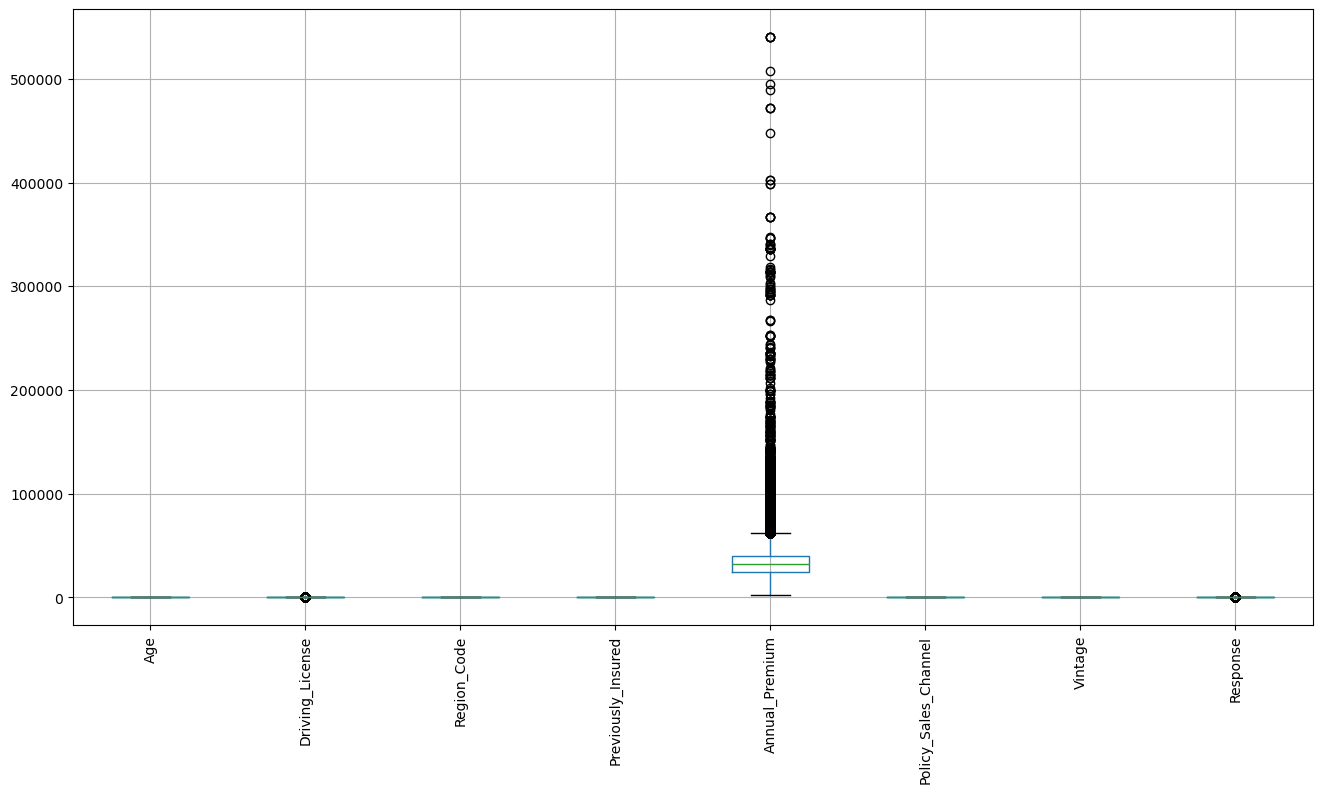

In [ ]:
# Checking Outliers in dataset
data.boxplot(figsize=(16,8))
plt.xticks(rotation=90)
plt.show()

In [ ]:
numeric_df = data.select_dtypes(include=['number'])

# Calculate quantiles
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [ ]:
((numeric_df > UL) | (numeric_df < LL)).sum().sort_values(ascending = False).head(20)

Response                46710
Annual_Premium          10320
Driving_License           812
Age                         0
Region_Code                 0
Previously_Insured          0
Policy_Sales_Channel        0
Vintage                     0
dtype: int64

Outliers are present in the Response, annual premium and driving license columns as 46710, 10320, 812 respectively.

we don't need to treat the outliers in the response column as it is the target variable.

In [ ]:
numeric_df.size

3048872

In [ ]:
((numeric_df > UL) | (numeric_df < LL)).sum().sum()

57842

In [ ]:
57842/3048872

0.018971606548257847

there are 1.89% of ouliers present in the dataset

In [ ]:
num_outliers = np.sum((numeric_df < LL) | (numeric_df > UL))

# Calculate total number of data points
total_points = len(numeric_df)
outlier_percentage = (num_outliers / total_points) * 100
outlier_percentage

Age                      0.000000
Driving_License          0.213062
Region_Code              0.000000
Previously_Insured       0.000000
Annual_Premium           2.707887
Policy_Sales_Channel     0.000000
Vintage                  0.000000
Response                12.256336
dtype: float64

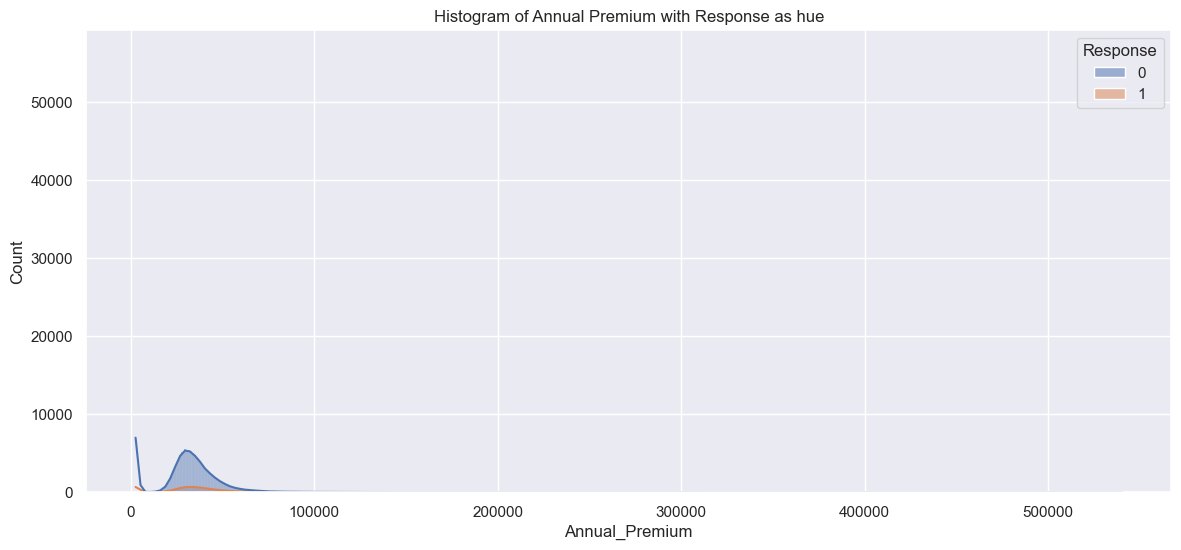

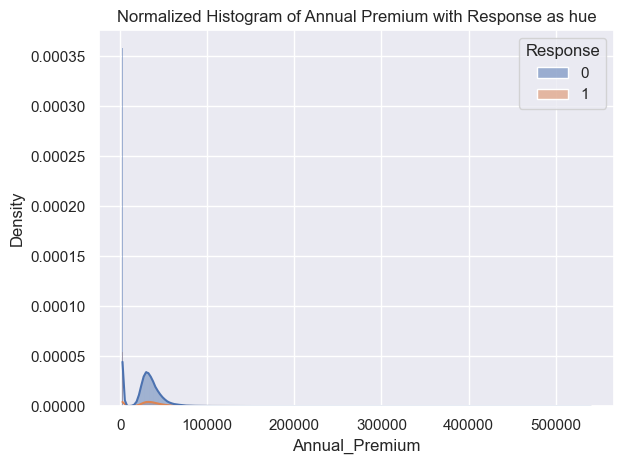

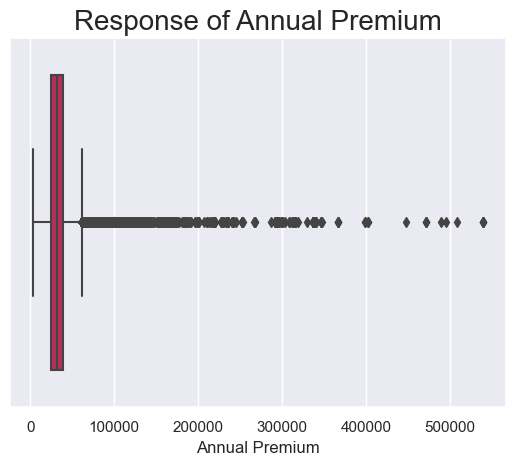

In [ ]:
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")

# Histogram of Annual Premium with Response as hue
sns.histplot(x='Annual_Premium', data=data, kde=True, hue='Response')
plt.title('Histogram of Annual Premium with Response as hue')
#plt.tight_layout()
plt.show()

sns.histplot(x='Annual_Premium', data=data, kde=True, hue='Response', stat='density')
plt.title('Normalized Histogram of Annual Premium with Response as hue')
plt.tight_layout()
plt.show()


# Box plot of Annual Premium
sns.boxplot(x='Annual_Premium', palette="rocket_r", data=data)
plt.title('Response of Annual Premium', fontsize=20)
plt.xlabel('Annual Premium')
plt.show()

From the distribution plot we can infer that the annual premium variable is right skewed

From the boxplot we can observe lot of outliers in the variable annual premium

### **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

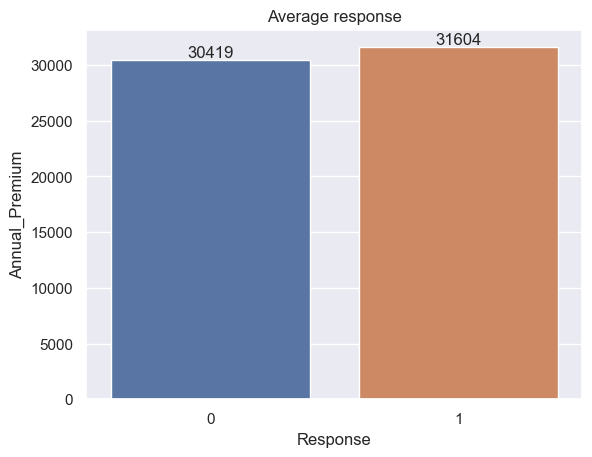

In [ ]:
az = sns.barplot(x="Response", y="Annual_Premium", estimator = np.mean, ci=None, data=data)
plt.title('Average response');
az.bar_label(az.containers[0], fmt = '%d');

The difference between the two response categories is relatively small.
Both groups have similar average annual premiums, with Response as interested having a slightly higher average.

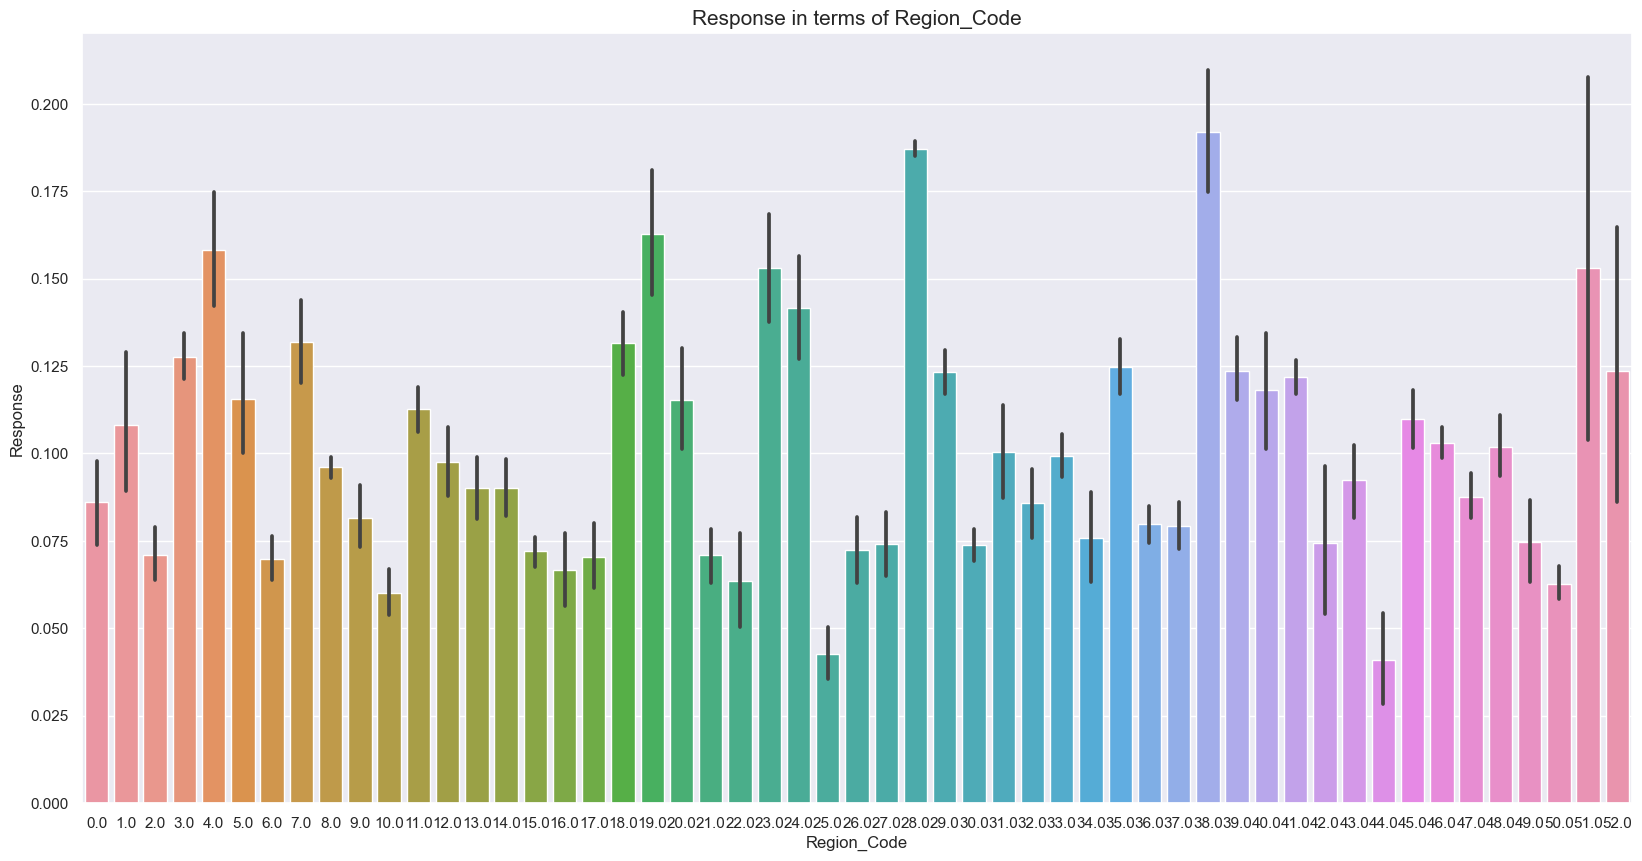

In [ ]:
#visualize the distribution of 'Response' in terms of 'Region_Code'
plt.figure(figsize=(20, 10))
sns.barplot(x='Region_Code', y='Response', data=data)
plt.title('Response in terms of Region_Code', fontsize=15)
plt.show()

Region Code - 0.38 has the highest numbers of customers.

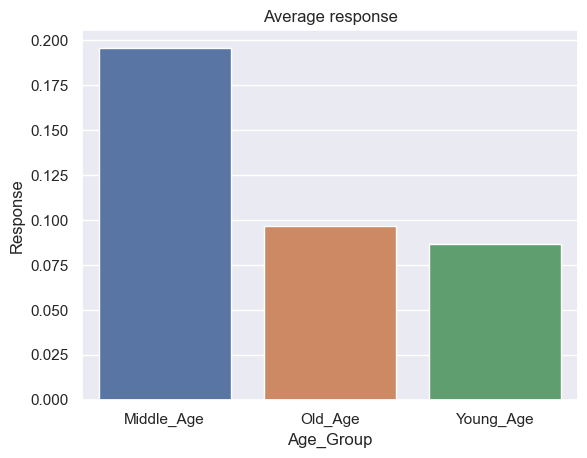

In [ ]:
az = sns.barplot(x="Age_Group", y="Response", estimator = np.mean, ci=None, data=data)
plt.title('Average response');

The Middle_Age group tends to have the highest average response.
The Young_Age group has the lowest average response.

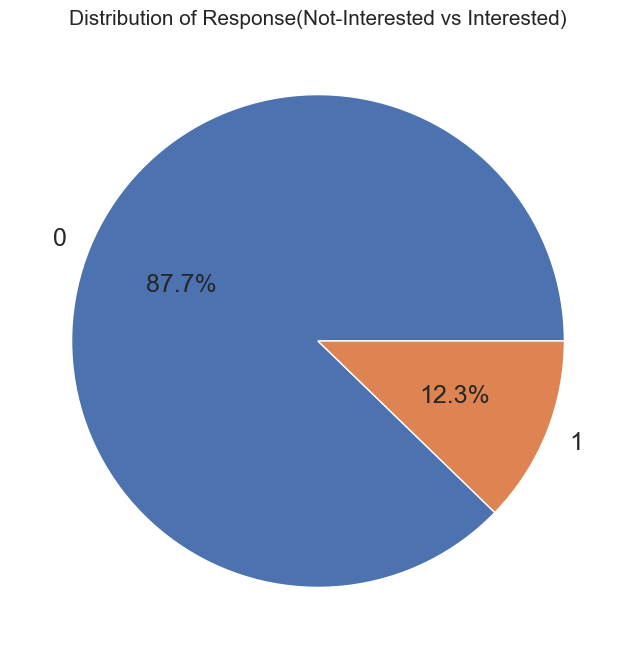

In [ ]:
# Plot pie chart for 'Response'
response_counts = data['Response'].value_counts()
response_counts.plot.pie(fontsize=18, autopct="%.1f%%", figsize=(10, 8), textprops={'fontsize': 15})
plt.title('Distribution of Response(Not-Interested vs Interested)', fontsize=15)
plt.ylabel('')  # Remove the label for y-axis
plt.show()

Data are not balanced, 87.7% percent peopel are not interest and 12.3 percent people are interest.

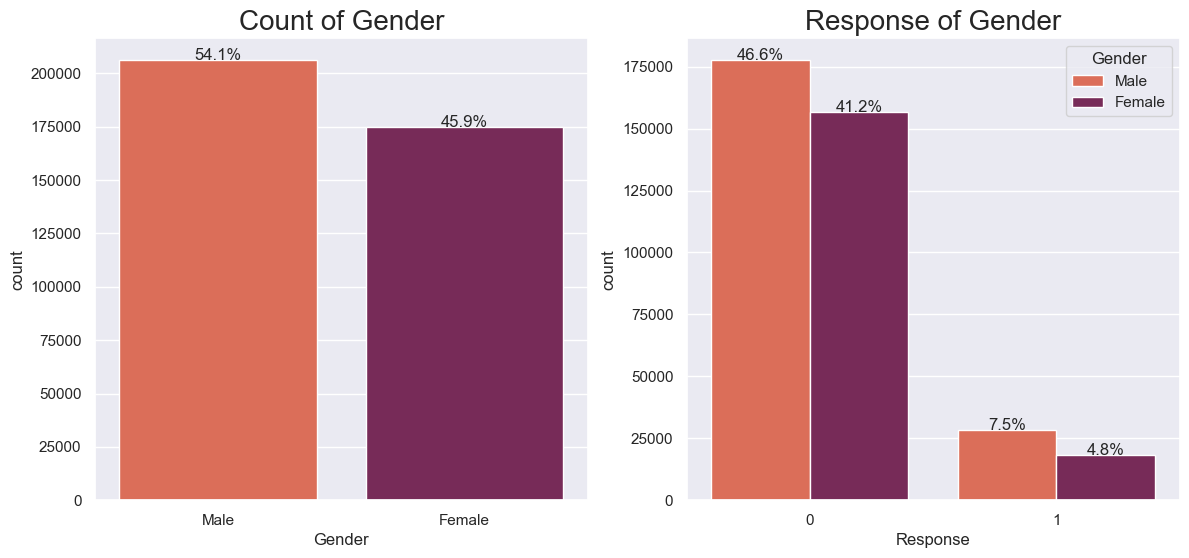

In [ ]:
plt.figure(figsize=(14, 6))

# First subplot: Count of Gender
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='Gender', palette="rocket_r", data=data)
plt.title('Count of Gender', fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')

# Second subplot: Response of Gender
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Response', hue='Gender', palette="rocket_r", data=data)
plt.title('Response of Gender', fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center')

plt.show()

As we can see from the graph,

The gender variable in the dataset is spread nearly evenly. The male category is marginally larger than the female category while the male catogory have 54.1 and the female catogory have 45.9.

For males, about 46.6% did not respond, and approximately 7.5% responded positively.

Among females, around 41.2% did not respond, and about 4.8% responded positively.

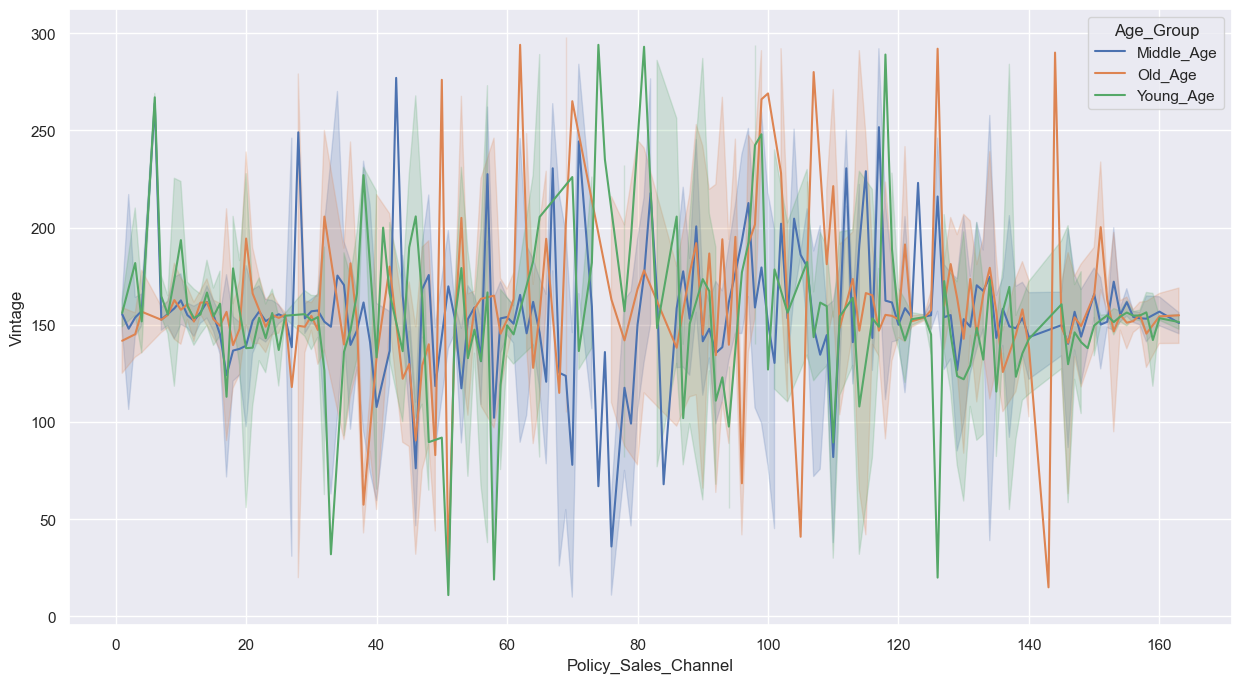

In [ ]:
#relationship between the 'Policy_Sales_Channel' and 'Vintage'
plt.figure(figsize=(15, 8))
sns.lineplot(data=data, x='Policy_Sales_Channel', y='Vintage', hue='Age_Group')
plt.show()

All three age groups exhibit fluctuations in the ‘Vintage’ variable across different ‘Policy_Sales_Channels.’
The Middle_Age group shows the most consistent pattern.
The Old_Age group has more variability.
The Young_Age group also shows fluctuations but with wider confidence intervals.

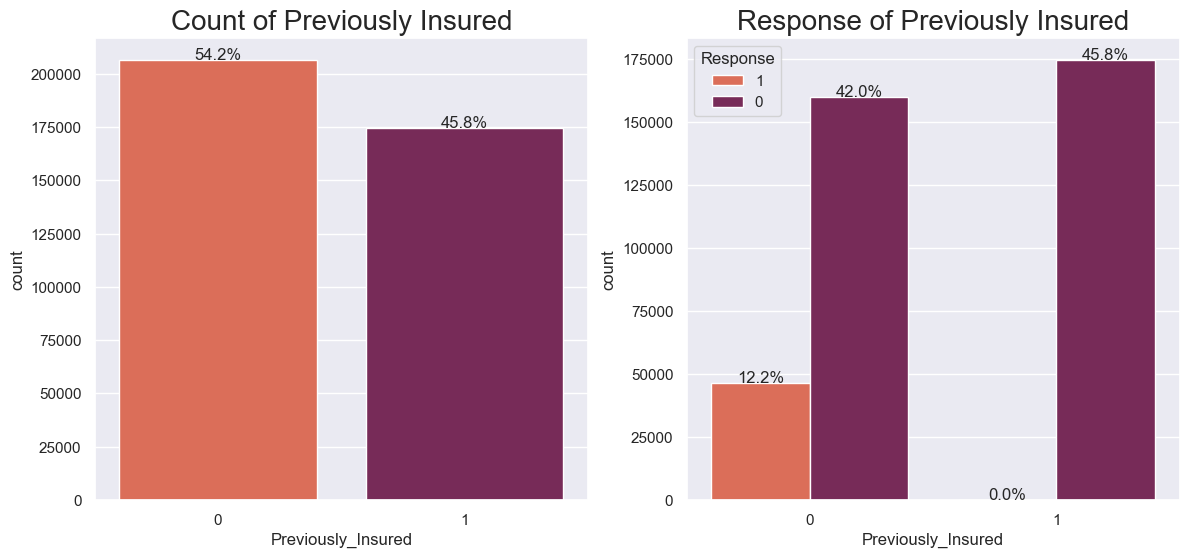

In [ ]:
plt.figure(figsize=(14, 6))

# First subplot: Count of Previously Insured
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='Previously_Insured', palette="rocket_r", data=data.astype(str))
plt.title('Count of Previously Insured', fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')

# Second subplot: Response of Previously Insured
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Previously_Insured', hue='Response', palette="rocket_r", data=data.astype(str))
plt.title('Response of Previously Insured', fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center')

plt.show()

As we can see from the graph,

45.8% people are insured previously, in that 12.2% poeple interested to buy the vehicle insurance again(insurance might be expired or should be renewed), Which means people are aware of insurance policy and ready to pay a premium amount, for better off taking actions to avoid certain risks or reduce risk.

So buying insurance makes the most sense when the potential loss is great and there is a significant probability of loss.

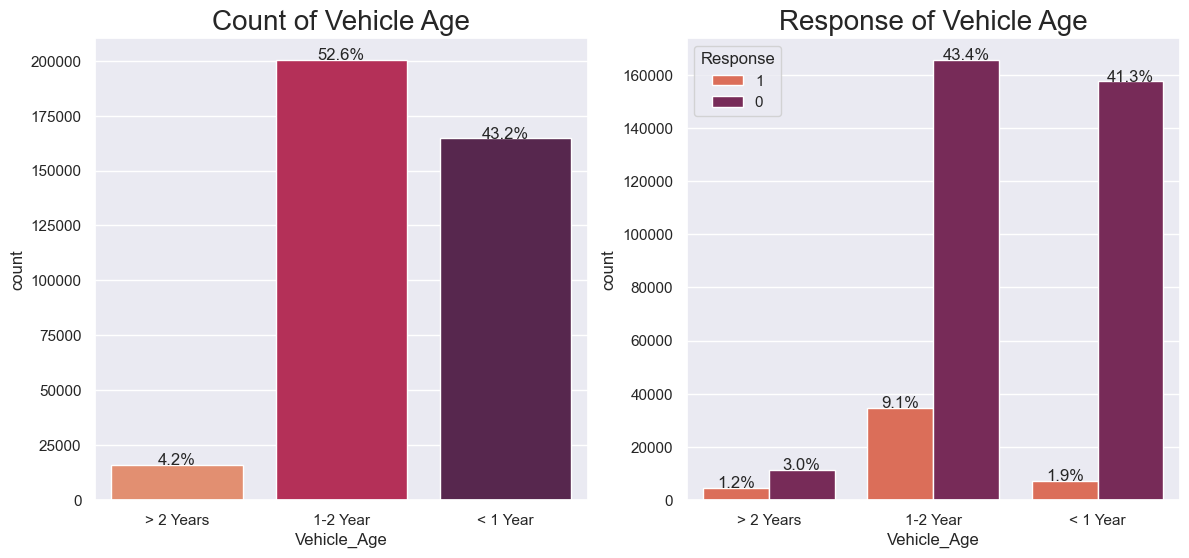

In [ ]:
plt.figure(figsize=(14, 6))

# First subplot: Count of Vehicle Age
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='Vehicle_Age', palette="rocket_r", data=data.astype(str))
plt.title('Count of Vehicle Age', fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')

# Second subplot: Response of Vehicle Age
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Vehicle_Age', hue='Response', palette="rocket_r", data=data.astype(str))
plt.title('Response of Vehicle Age', fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center')

plt.show()

As we can see from the graph,

Around 4.2% of vehicles are more than two years old, 52.6% are between one and two years old, and 43.2% are under one year old.
1.2% are interested in purchasing vehicle insurance for vehicles older than 2 years, 9.1% are interested in purchasing insurance for vehicles between 1 and 2 years old, and 1.9% are interested in purchasing insurance for vehicles older than 1 year.

As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk

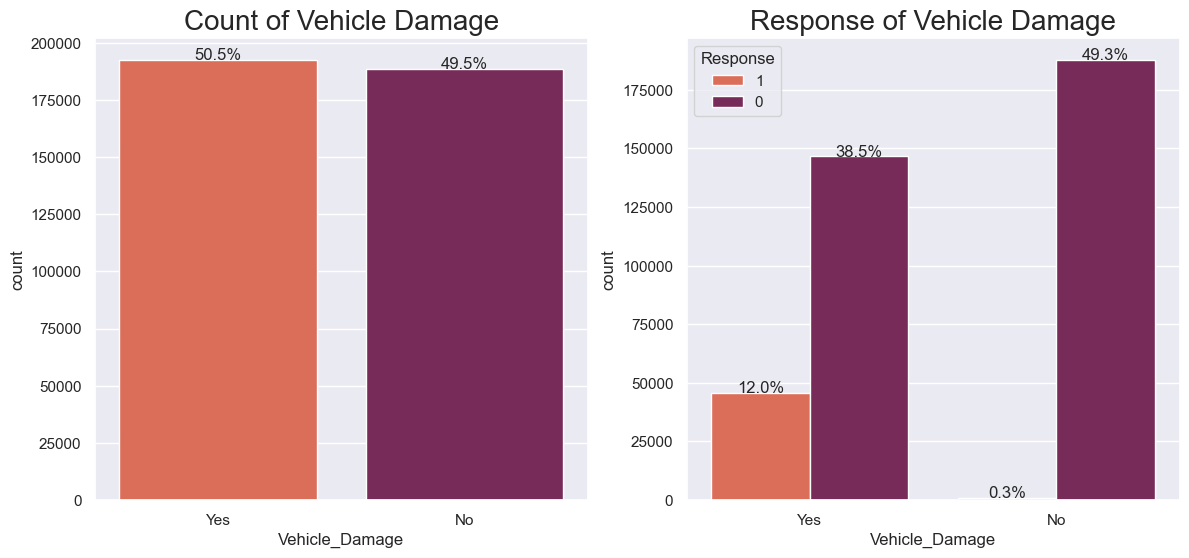

In [ ]:
plt.figure(figsize=(14, 6))

# First subplot: Count of Vehicle Damage
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='Vehicle_Damage', palette="rocket_r", data=data.astype(str))
plt.title('Count of Vehicle Damage', fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')

# Second subplot: Response of Vehicle Damage
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Vehicle_Damage', hue='Response', palette="rocket_r", data=data.astype(str))
plt.title('Response of Vehicle Damage', fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center')

plt.show()

As we can see from the graph,

50.5% of the vehicles have past damage and 49.5% of the vehicles have not been damaged.

12.0% of people who have had a damaged vehicle in the past want to acquire vehicle insurance

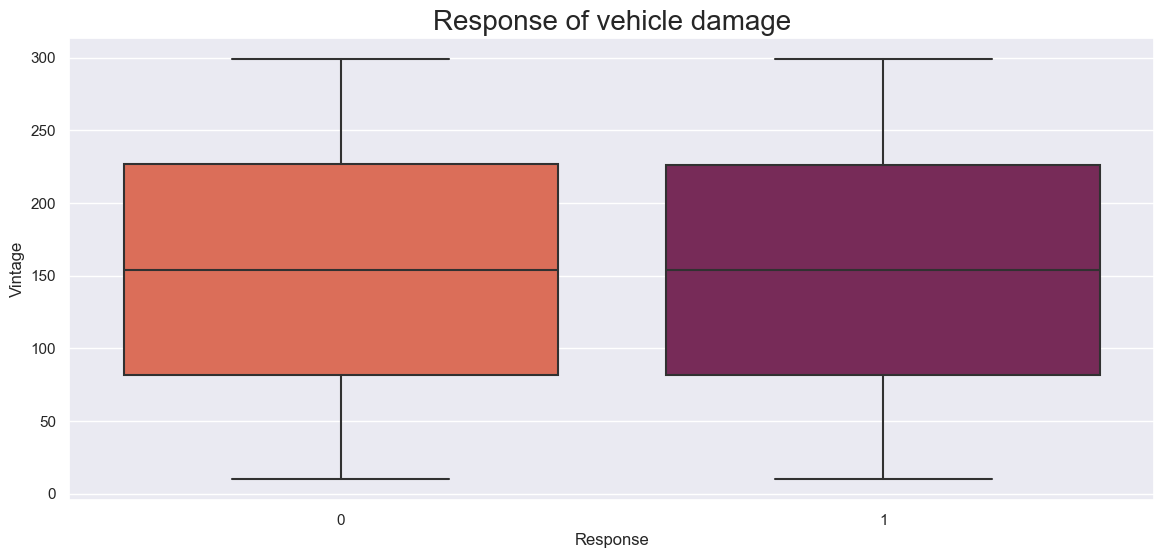

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Response',y='Vintage',palette="rocket_r", data=data)
plt.title('Response of vehicle damage',fontsize=20)
plt.show()

We can also see that Vintage has an almost uniform distribution from above figure.

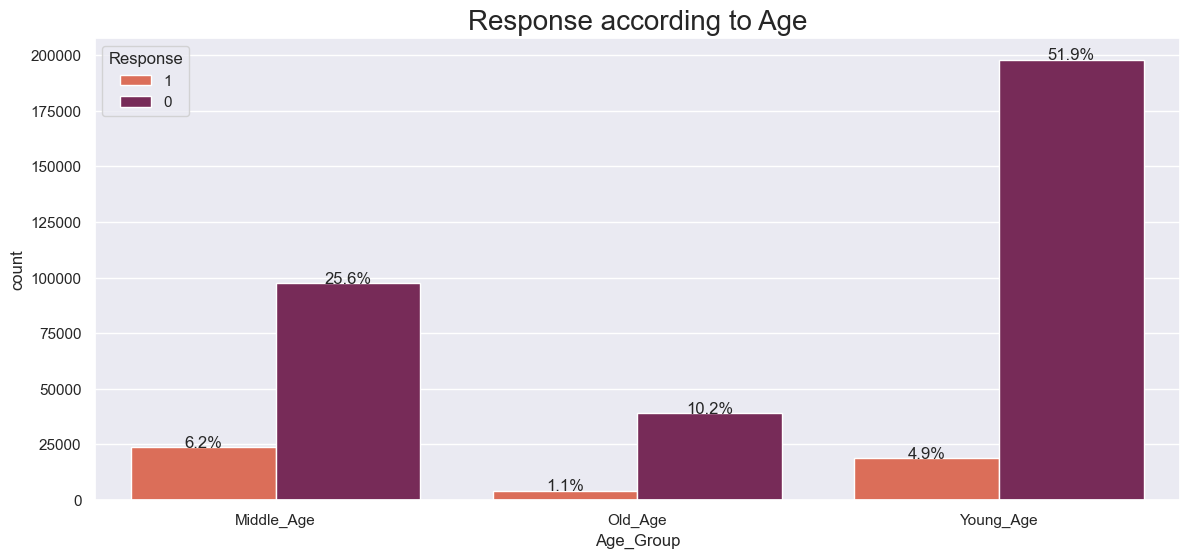

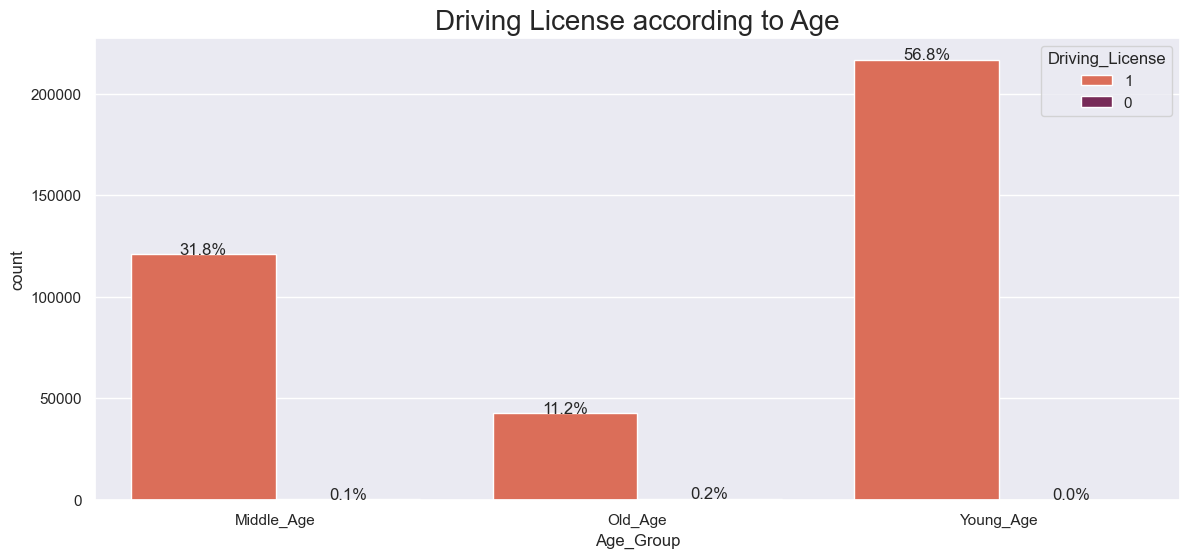

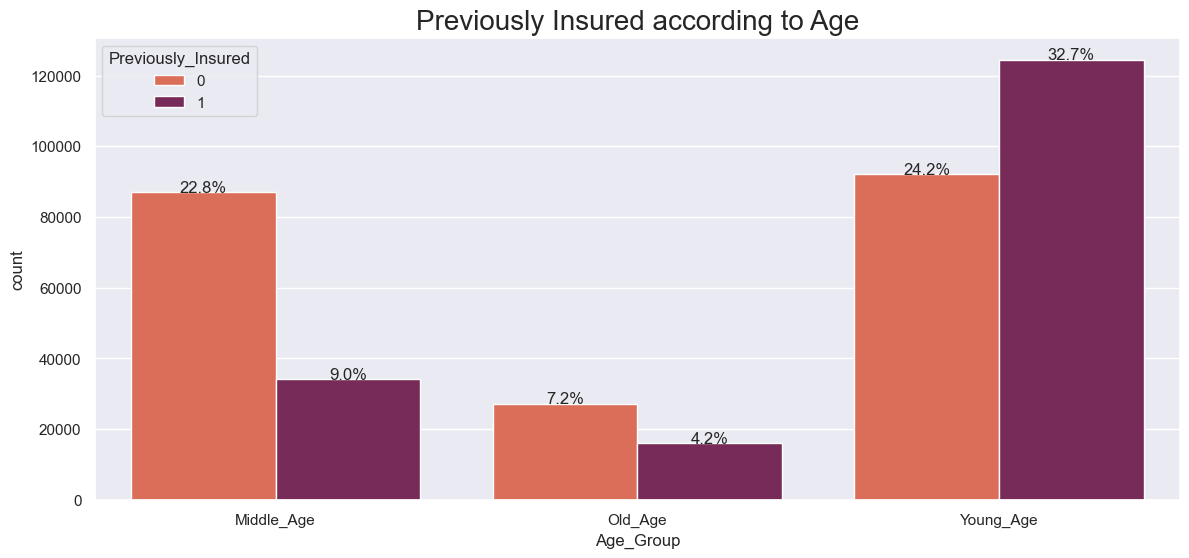

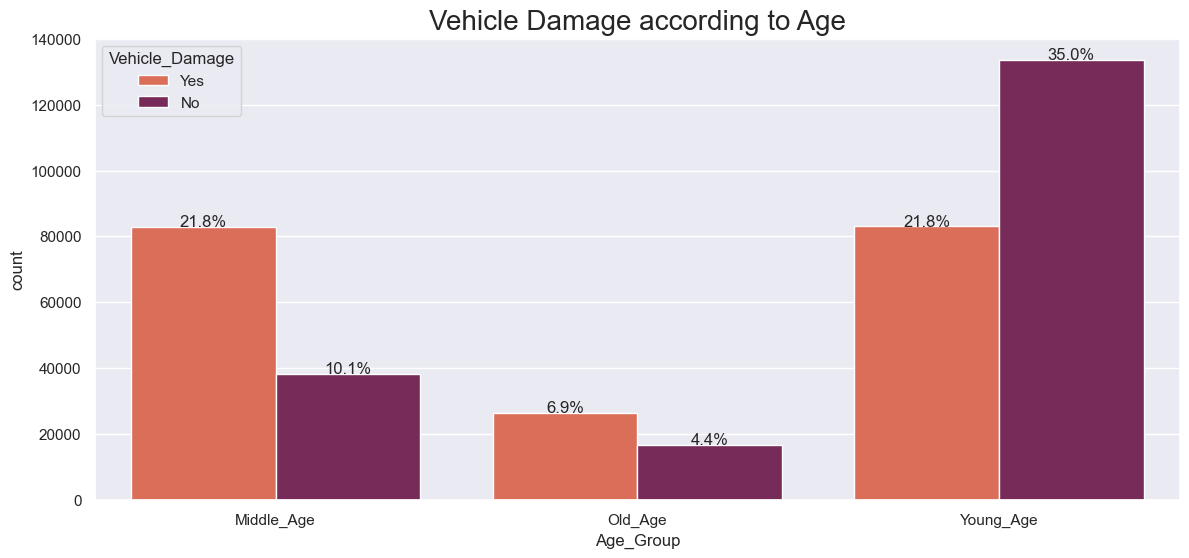

In [ ]:
# Plotting Response according to age
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
total = float(len(data))
ax = sns.countplot(x='Age_Group', hue='Response', palette="rocket_r", data=data.astype(str))
plt.title('Response according to Age', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

# Plotting Driving License according to age
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x='Age_Group', hue='Driving_License', palette="rocket_r", data=data.astype(str))
plt.title('Driving License according to Age', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

# Plotting Previously Insured according to age
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x='Age_Group', hue='Previously_Insured', palette="rocket_r", data=data.astype(str))
plt.title('Previously Insured according to Age', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

# Plotting Vehicle Damage according to age
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x='Age_Group', hue='Vehicle_Damage', palette="rocket_r", data=data.astype(str))
plt.title('Vehicle Damage according to Age', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

According to age wise:

9.3% of people in their middle age people are interested in purchasing insurance.

Almost 47% of middle-aged individuals have a driver's licence.

About 21.9% of people in their teens have health insurance.

Around 21.9% of persons in their teens have had insurance previously.

So most teenagers have insurance and are aware of their policy. So the target audience might be middle-aged people and teenagers to generate more leads for insurance companies.

#### **Correlation Heatmap**

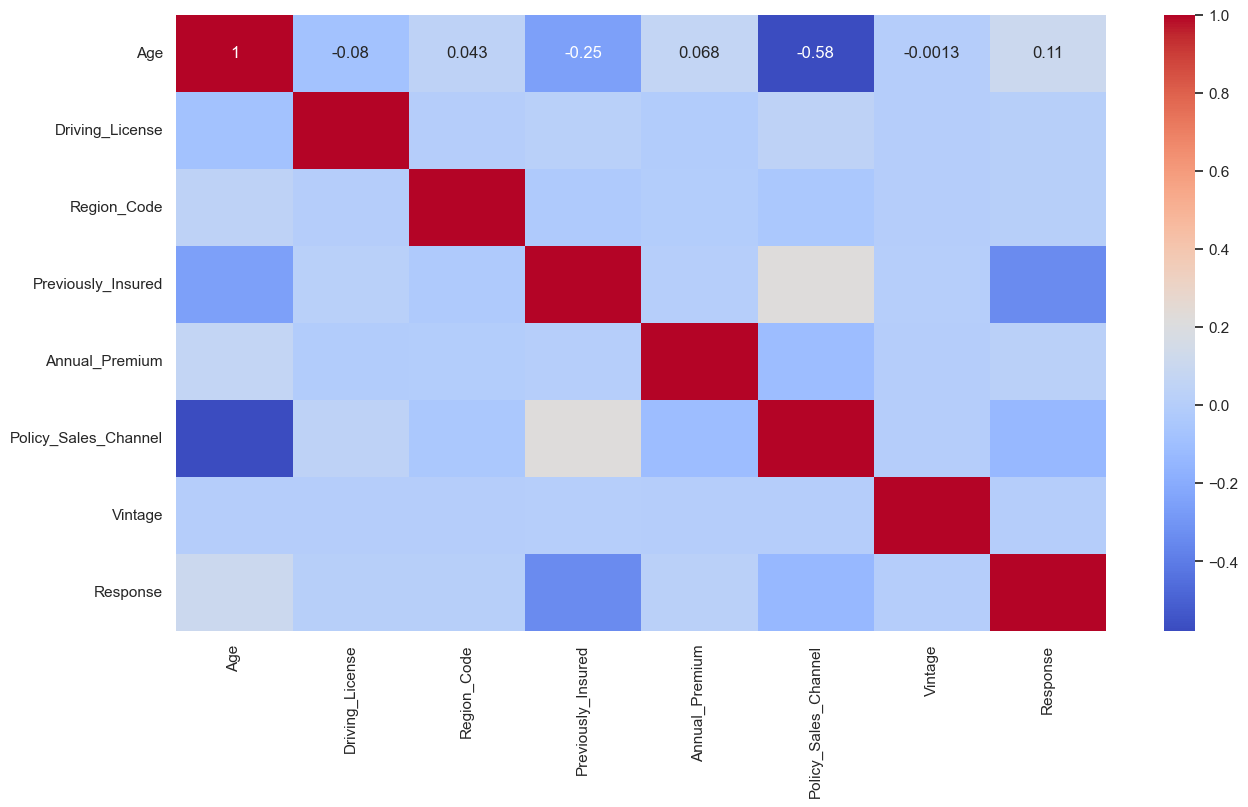

In [ ]:
# Correlation Heatmap visualization code
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True)
plt.show()

There is a relatively strong positive correlation between the “Previously_Insured” feature and the “Response” (target variable). This suggests that customers who were previously insured are more likely to respond positively.
There is a negative correlation between the “Policy_Sales_Channel” and both “Age” and “Vintage.” This implies that certain sales channels are associated with different age groups or vintage

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Finding Multicollinearity
def cal_vif(X):
    # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [ ]:
cal_vif(data[[i for i in data.describe().columns if i not in ['Response']]])

,variables,VIF
0,Age,10.452843
1,Driving_License,35.186725
2,Region_Code,4.954016
3,Previously_Insured,1.986280
4,Annual_Premium,4.174542
5,Policy_Sales_Channel,7.749016
6,Vintage,4.373156


Since practically every customer has a driver's license, it is useless to insure anyone without one because it would be detrimental to the business. Hence, we wouldn't provide vehicle insurance to someone who didn't have a license to drive. As we can drop driving license column as they are not providing any valuable information.

### **Handling Outliers**

In [ ]:
data = data.drop(columns=['Driving_License'],axis=1)

In [ ]:
data = data.drop(columns=['Age_Group'],axis=1)

In [ ]:
Q1 = data['Annual_Premium'].quantile(0.25)
Q3 = data['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

# Filter out outliers
df_filtered = data[(data['Annual_Premium'] >= LL) & (data['Annual_Premium'] <= UL)]

# Verify the result
print("Number of rows after removing outliers:", len(df_filtered))

Number of rows after removing outliers: 370789


In [ ]:
# Reset the index
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
370784,Male,74,26.0,1,1-2 Year,No,30170.0,26.0,88,0
370785,Male,30,37.0,1,< 1 Year,No,40016.0,152.0,131,0
370786,Male,21,30.0,1,< 1 Year,No,35118.0,160.0,161,0
370787,Female,68,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### **Encoding**

In [ ]:
df_Enc = pd.get_dummies(df_filtered,drop_first=True)

df_Enc.head()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,0,40454.0,26.0,217,1,True,False,True,True
1,76,3.0,0,33536.0,26.0,183,0,True,False,False,False
2,47,28.0,0,38294.0,26.0,27,1,True,False,True,True
3,21,11.0,1,28619.0,152.0,203,0,True,True,False,False
4,29,41.0,1,27496.0,152.0,39,0,False,True,False,False


In [ ]:
df_Enc.columns = df_Enc.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('-', '_').str.replace('[', '_').str.replace(']', '_').str.replace('.', '').str.replace('+', '_Plus').str.replace('>', '_Plus').str.replace('<', '_Plus')

In [ ]:
# Copy all the predictor variables into X dataframe
X = df_Enc.drop('Response', axis=1)

# Copy target into the y dataframe.
y = df_Enc[['Response']]

### **Scaling**

In [ ]:
from scipy.stats import zscore
df_scaled = X.apply(zscore)
display(df_scaled.head())
display(y.head())

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age__Plus_1_Year,Vehicle_Age__Plus_2_Years,Vehicle_Damage_Yes
0,0.345182,0.117406,-0.922337,0.758959,-1.601474,0.748826,0.922493,-0.878668,4.865175,0.993728
1,2.417701,-1.760828,-0.922337,0.289720,-1.601474,0.342470,0.922493,-0.878668,-0.205542,-1.006312
2,0.539480,0.117406,-0.922337,0.612449,-1.601474,-1.521990,0.922493,-0.878668,4.865175,0.993728
3,-1.144442,-1.159793,1.084202,-0.043793,0.730152,0.581503,0.922493,1.138086,-0.205542,-1.006312
4,-0.626312,1.094088,1.084202,-0.119965,0.730152,-1.378570,-1.084019,1.138086,-0.205542,-1.006312


,Response
0,1
1,0
2,1
3,0
4,0


**train-test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.25 , random_state=1206, stratify = y)

### **machine learning model algorithms**

##### **Random Forest**

In [ ]:
# Initialize the RandomForestClassifier
RF = RandomForestClassifier(random_state=123, n_jobs=-1)

# Train the model
RF.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=123)

In [ ]:
# Make predictions on the train and test set
ytrain_predict = RF.predict(X_train)
ytest_predict = RF.predict(X_test)

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    244225
           1       1.00      1.00      1.00     33866

    accuracy                           1.00    278091
   macro avg       1.00      1.00      1.00    278091
weighted avg       1.00      1.00      1.00    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93     81409
           1       0.37      0.12      0.18     11289

    accuracy                           0.87     92698
   macro avg       0.63      0.55      0.55     92698
weighted avg       0.82      0.87      0.84     92698
 

Confusion matrix on the training data 



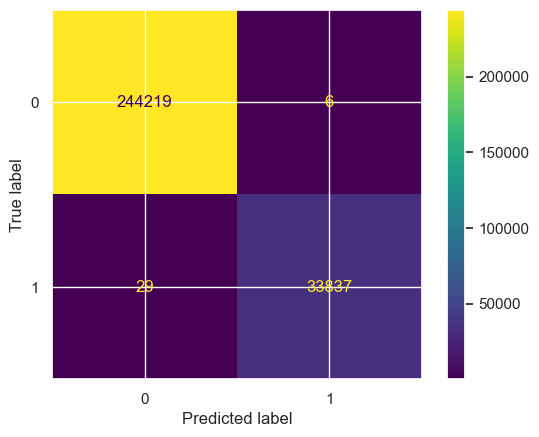

Confusion matrix on the test data 



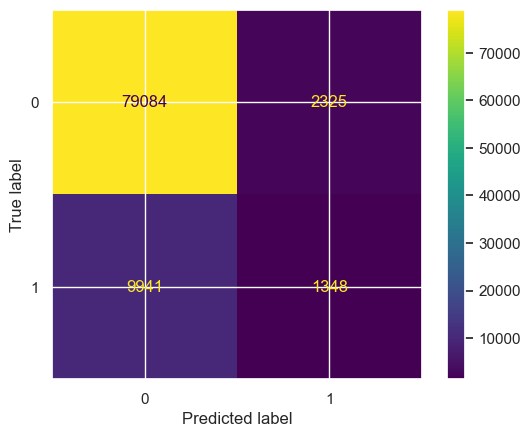

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, RF.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, RF.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=RF.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=RF.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=RF.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=RF.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 1.000
AUC for the Test Data: 0.838


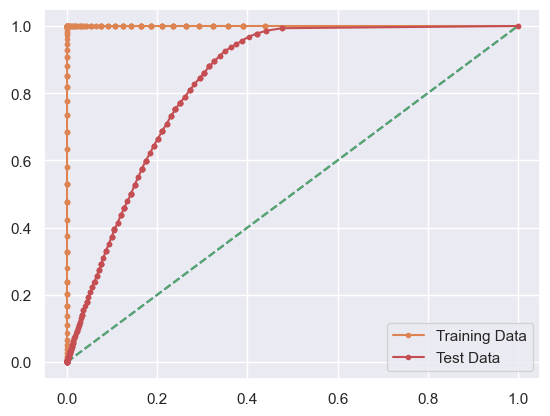

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,RF.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,RF.predict_proba(X_train)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,RF.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,RF.predict_proba(X_test)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

The Random forest model is overfitting for the dataset. This model is predicting very well for the training dataset but not for the testing dataset.

For testing dataset we got for 0 class precision=0.89,recall = 0.97,f1-score = 0.93. And for class 1,precision = 0.37, recall=0.12, f1-score = 0.18

for 0 class it is performing well but not for class 1.

**Hyperparameter tuning for Random forest**

In [ ]:
from scipy.stats import uniform
# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(RF, param_dist, cv=5, scoring='recall', n_iter=10)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


In [ ]:
print(random_search.best_params_,'\n')
print(random_search.best_estimator_,'\n')
print(random_search.best_score_,'\n')

best_model_rf = random_search.best_estimator_

ytrain_predict = best_model_rf.predict(X_train)
ytest_predict = best_model_rf.predict(X_test)

{'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30} 

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=5,
                       n_estimators=10, n_jobs=-1, random_state=123) 

0.12088829319388525 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.95      1.00      0.97    244225
           1       0.97      0.59      0.73     33866

    accuracy                           0.95    278091
   macro avg       0.96      0.79      0.85    278091
weighted avg       0.95      0.95      0.94    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93     81409
           1       0.36      0.12      0.18     11289

    accuracy                           0.87     92698
   macro avg       0.62      0.54      0.55     92698
weighted avg       0.82      0.87      0.84     92698
 

Confusion matrix on the training data 



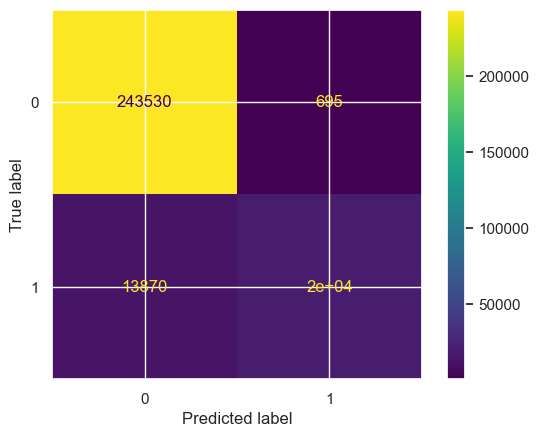

Confusion matrix on the test data 



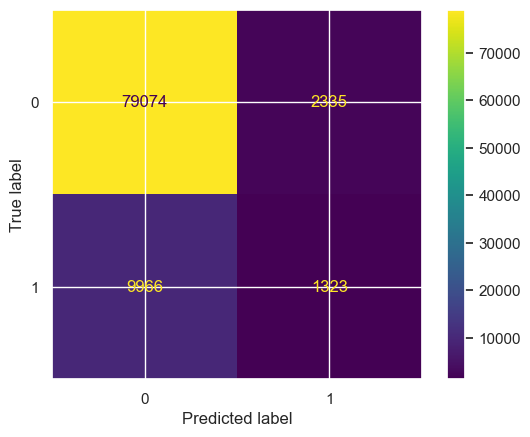

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_rf.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_rf.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_rf.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_rf.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_rf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_rf.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.990
AUC for the Test Data: 0.827


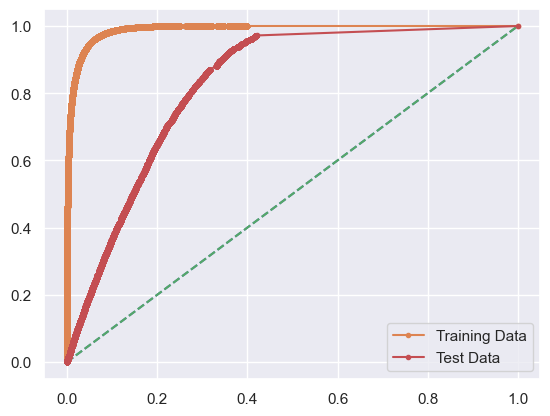

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_rf.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_rf.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_rf.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_rf.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

By doing hyperparameter tuning still didn't got better results

**Smote oversampling**

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together

In [ ]:
# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the hyperparameter distribution with narrowed down ranges
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest classifier
RF = RandomForestClassifier()

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    RF,
    param_dist,
    cv=3,
    scoring='recall',
    n_iter=10,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_res, y_train_res)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [ ]:
print(random_search.best_params_,'\n')
print(random_search.best_estimator_,'\n')
print(random_search.best_score_,'\n')

best_model_rf = random_search.best_estimator_

ytrain_predict = best_model_rf.predict(X_train)
ytest_predict = best_model_rf.predict(X_test)

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10} 

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50) 

0.9626041071978948 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      0.68      0.80    244225
           1       0.28      0.92      0.43     33866

    accuracy                           0.71    278091
   macro avg       0.63      0.80      0.62    278091
weighted avg       0.90      0.71      0.76    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.68      0.80     81409
           1       0.28      0.91      0.43     11289

    accuracy                           0.71     92698
   macro avg       0.63      0.79      0.62     92698
weighted avg       0.90      0.71      0.76     92698
 

Confusion matrix on the training data 



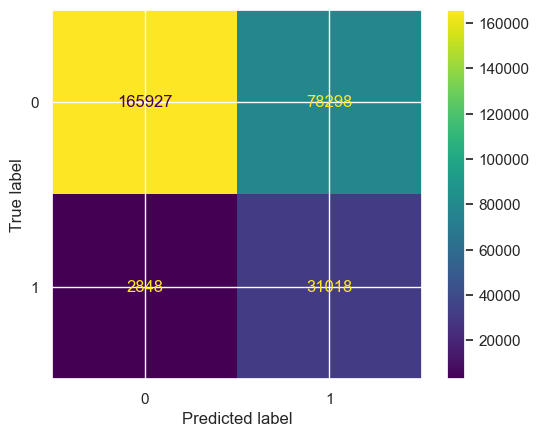

Confusion matrix on the test data 



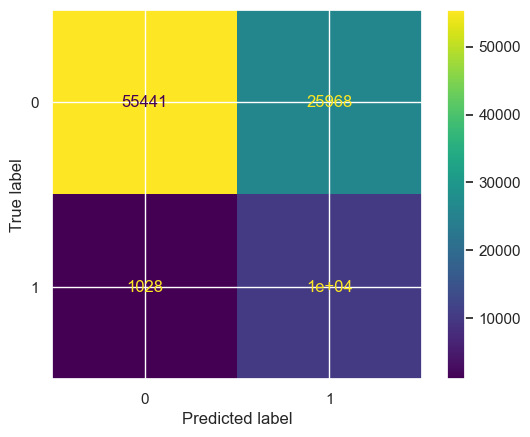

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_rf.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_rf.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_rf.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_rf.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_rf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_rf.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.853
AUC for the Test Data: 0.851


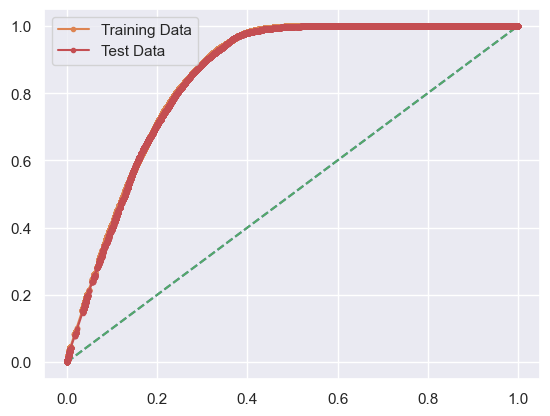

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_rf.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_rf.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_rf.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_rf.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

After using smote oversampling method, got a good result for both class 0 and 1.

and there are no overfitting for this model now.

##### **XG Boost**

In [ ]:
# Initialize the XGBClassifier
XGB = xgb.XGBClassifier(random_state=123, n_jobs=-1)

# Train the model
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)

In [ ]:
# Make predictions on the train and test set
ytrain_predict = XGB.predict(X_train)
ytest_predict = XGB.predict(X_test)

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94    244225
           1       0.72      0.05      0.10     33866

    accuracy                           0.88    278091
   macro avg       0.80      0.52      0.52    278091
weighted avg       0.86      0.88      0.83    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     81409
           1       0.46      0.03      0.06     11289

    accuracy                           0.88     92698
   macro avg       0.67      0.51      0.50     92698
weighted avg       0.83      0.88      0.83     92698
 

Confusion matrix on the training data 



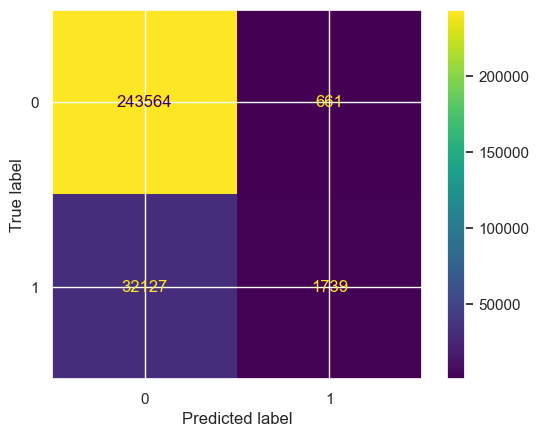

Confusion matrix on the test data 



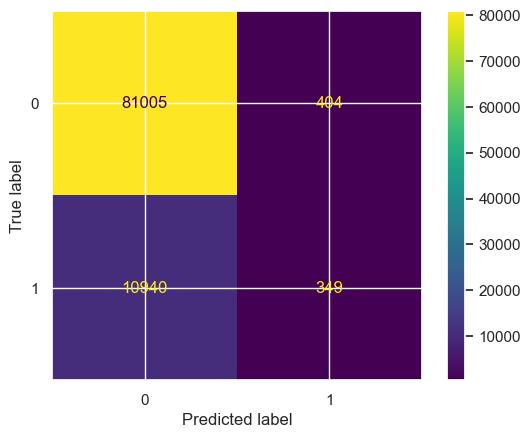

In [ ]:
# Print classification report for training data
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, XGB.predict(X_train)),'\n')
# Print classification report for test data
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, XGB.predict(X_test)),'\n')

# Confusion matrix for training data
print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=XGB.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=XGB.classes_)
disp1.plot()

plt.show()

# Confusion matrix for test data
print('Confusion matrix on the test data', '\n')
cm2 = confusion_matrix(y_test, ytest_predict, labels=XGB.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=XGB.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.882
AUC for the Test Data: 0.857


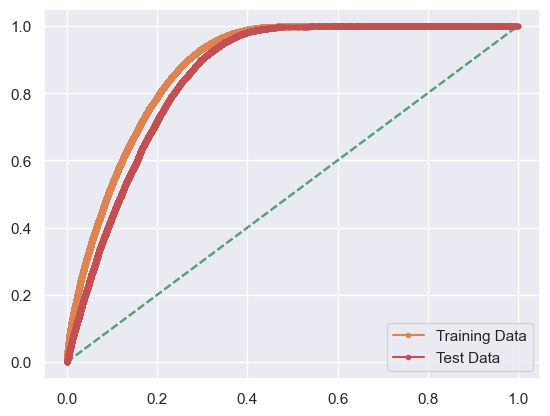

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,XGB.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,XGB.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,XGB.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,XGB.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

XG Boost model is having slightly (0.03) overfitting. But for both training and testing dataset the model is not predicting well for class 1.
the overal accuracy is 0.88.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

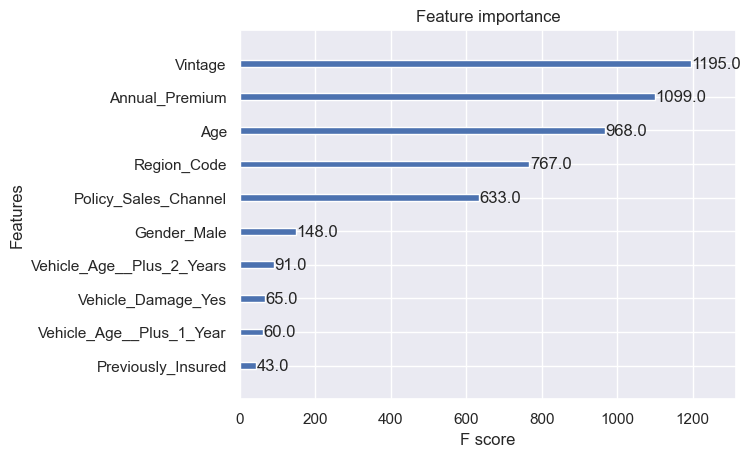

In [ ]:
# Plot feature importance
xgb.plot_importance(XGB)

**Hyperparameter tuning of XG Boost**

In [ ]:
param_grid={
 'gamma': [0,1,2,3,4,5,6,7,9,15,20],
 'max_depth': [3, 5, 7,1,2,6,8,9,10,15,20,25,30],
 'min_child_weight' : range(0,6,1),
 'learning_rate': [0.01, 0.1, 0.2,0.001,0.0001,0.00001,0.000001],
 'subsample' : [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
 'colsample_bytree' : [0.5,0.6,0.7,0.8,0.9]
}


In [ ]:
# Initialize RandomizedSearchCV
Random_Search_XGB = RandomizedSearchCV(estimator=XGB, param_distributions=param_grid,
                                       n_iter=10, n_jobs=-1, cv=10, verbose=3,
                                       random_state=123, scoring='recall')

# Perform RandomizedSearchCV
Random_Search_XGB.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = Random_Search_XGB.best_params_
best_estimator = Random_Search_XGB.best_estimator_

# Predict and evaluate the model
y_pred = best_estimator.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Best parameters found: ", best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found:  {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 25, 'learning_rate': 0.2, 'gamma': 6, 'colsample_bytree': 0.5}


In [ ]:
print(Random_Search_XGB.best_params_,'\n')
print(Random_Search_XGB.best_estimator_,'\n')
print(Random_Search_XGB.best_score_,'\n')

best_model_XGB = Random_Search_XGB.best_estimator_

ytrain_predict = best_model_XGB.predict(X_train)
ytest_predict = best_model_XGB.predict(X_test)

{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 25, 'learning_rate': 0.2, 'gamma': 6, 'colsample_bytree': 0.5} 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...) 

0.0071458990466135505 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94    244225
           1       0.63      0.01      0.02     33866

    accuracy                           0.88    278091
   macro avg       0.75      0.50      0.48    278091
weighted avg       0.85      0.88      0.82    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94     81409
           1       0.50      0.01      0.01     11289

    accuracy                           0.88     92698
   macro avg       0.69      0.50      0.47     92698
weighted avg       0.83      0.88      0.82     92698
 

Confusion matrix on the training data 



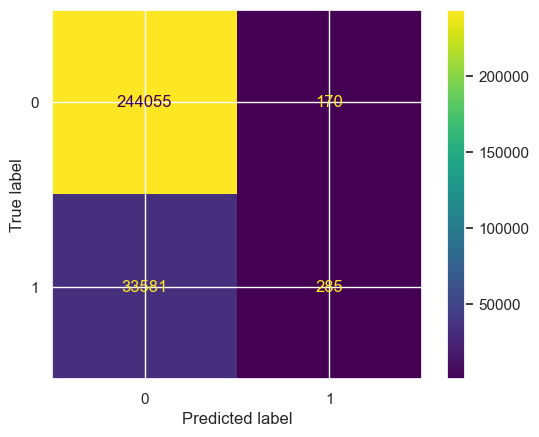

Confusion matrix on the test data 



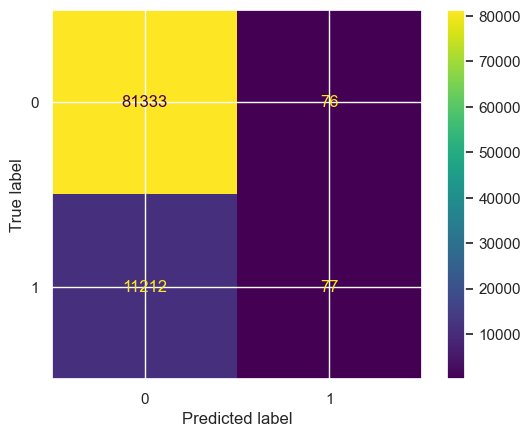

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_XGB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_XGB.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_XGB.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_XGB.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_XGB.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_XGB.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.862
AUC for the Test Data: 0.860


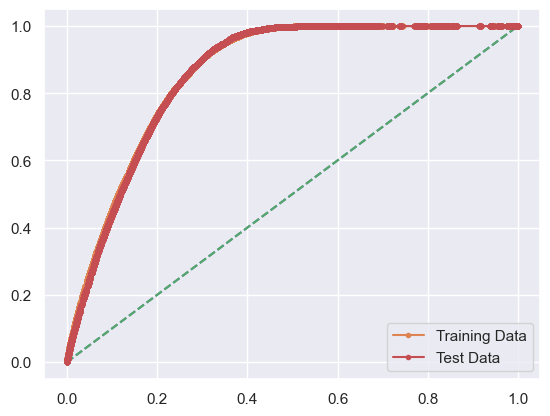

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_XGB.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_XGB.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_XGB.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_XGB.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

After hyperparameter tuning there is no overfitting for the model. But the prediction for the class 1 is still not good.

**Oversampling**

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': sp_randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': sp_randint(50, 200),
    'min_child_weight': sp_randint(1, 10),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize XGBoost classifier
#xgb = XGBClassifier(random_state=123)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=XGB, param_distributions=param_grid,
                                   n_iter=10, n_jobs=-1, cv=5, verbose=3,
                                   random_state=123, scoring='recall')

# Perform RandomizedSearchCV on resampled data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print(random_search.best_params_,'\n')
print(random_search.best_estimator_,'\n')
print(random_search.best_score_,'\n')

best_model_XGB = random_search.best_estimator_

ytrain_predict = best_model_XGB.predict(X_train)
ytest_predict = best_model_XGB.predict(X_test)

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 67, 'subsample': 0.9} 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=67, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...) 

0.9523922612345173 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      0.66      0.79    244225
           1       0.27      0.93      0.42     33866

    accuracy                           0.69    278091
   macro avg       0.63      0.79      0.60    278091
weighted avg       0.90      0.69      0.74    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.66      0.79     81409
           1       0.27      0.93      0.42     11289

    accuracy                           0.69     92698
   macro avg       0.63      0.79      0.61     92698
weighted avg       0.90      0.69      0.75     92698
 

Confusion matrix on the training data 



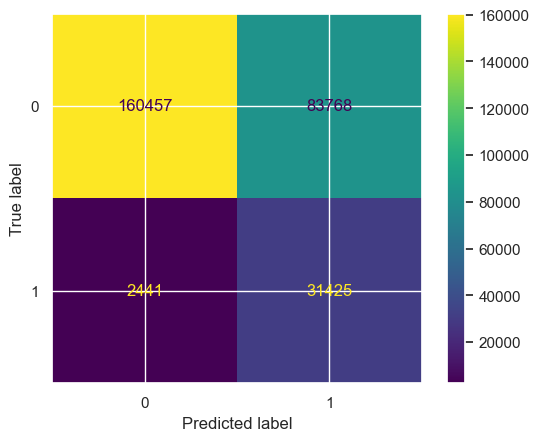

Confusion matrix on the test data 



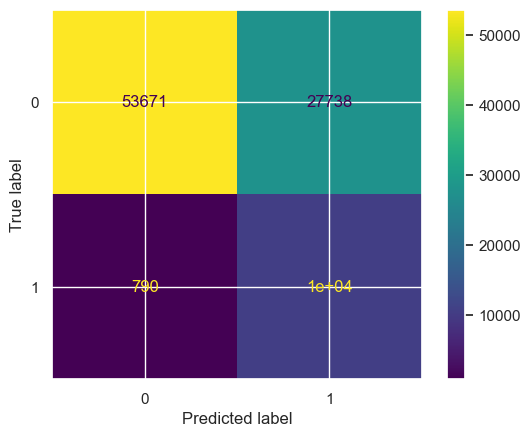

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_XGB.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_XGB.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_XGB.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_XGB.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_XGB.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_XGB.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.846
AUC for the Test Data: 0.846


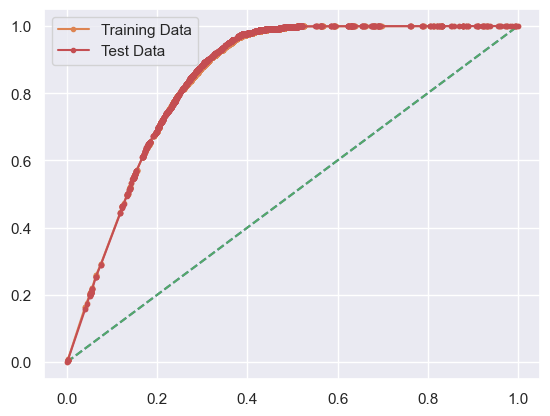

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_XGB.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_XGB.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_XGB.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_XGB.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

After the resampling using the smote, there are no overfitting and the prediction for the class one has gotten better.

##### **GaussianNB**

In [ ]:
# Create and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the training and test sets
ytrain_predict = gnb.predict(X_train)
ytest_predict = gnb.predict(X_test)

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.97      0.70      0.81    244225
           1       0.28      0.86      0.42     33866

    accuracy                           0.72    278091
   macro avg       0.63      0.78      0.62    278091
weighted avg       0.89      0.72      0.76    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.70      0.81     81409
           1       0.28      0.86      0.43     11289

    accuracy                           0.72     92698
   macro avg       0.63      0.78      0.62     92698
weighted avg       0.89      0.72      0.77     92698
 

Confusion matrix on the training data 



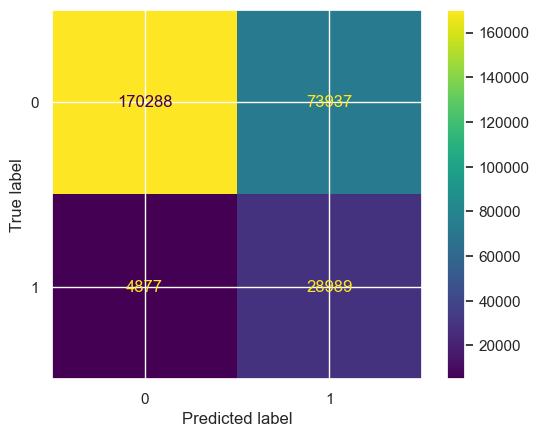

Confusion matrix on the test data 



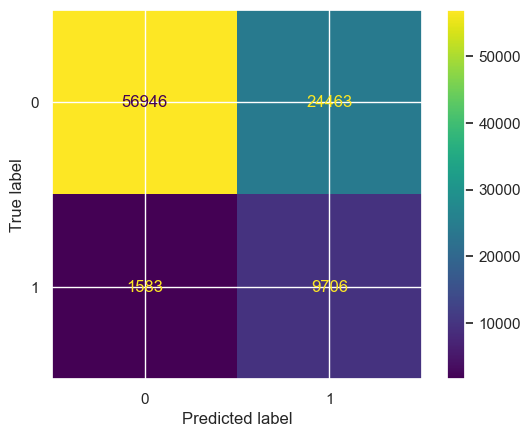

In [ ]:
# Print classification report for training data
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, gnb.predict(X_train)),'\n')

# Print classification report for test data
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, gnb.predict(X_test)),'\n')


# Confusion matrix for training data
print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=gnb.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=gnb.classes_)
disp1.plot()

plt.show()


# Confusion matrix for test data
print('Confusion matrix on the test data', '\n')
cm2 = confusion_matrix(y_test, ytest_predict, labels=gnb.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=gnb.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.821
AUC for the Test Data: 0.824


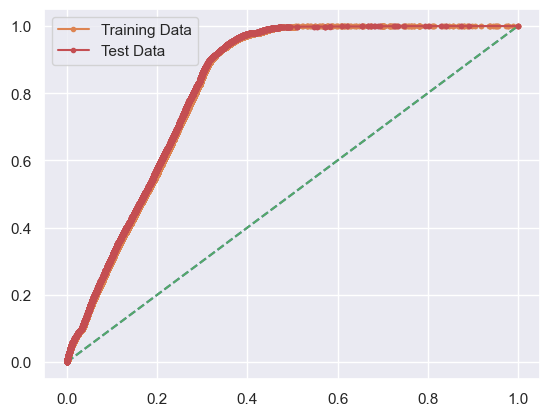

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,gnb.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,gnb.predict_proba(X_train)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,gnb.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,gnb.predict_proba(X_test)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

GaussianNB model is fitting very well with both the training and testing dataset, and for both classes 0 and 1, this model is predicting well.

**Hyperparameter Tuning For GaussianNB**

In [ ]:
from scipy.stats import uniform

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-10, 1e-4],
             'priors': [None, [0.1, 0.2, 0.7], [0.3, 0.4, 0.3]]}

from sklearn.metrics import recall_score
# Define the parameter grid
param_grid = {
    'var_smoothing': uniform(1e-9, 1e-7)
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gnb, param_distributions=param_grid,
                                   n_iter=10, n_jobs=-1, cv=5, verbose=3,
                                   random_state=123, scoring='recall')

# Perform RandomizedSearchCV
random_search_gnb = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print(random_search_gnb.best_params_,'\n')
print(random_search_gnb.best_estimator_,'\n')
print(random_search_gnb.best_score_,'\n')

best_model_gnb = random_search_gnb.best_estimator_

ytrain_predict = best_model_gnb.predict(X_train)
ytest_predict = best_model_gnb.predict(X_test)

{'var_smoothing': 7.064691855978616e-08} 

GaussianNB(var_smoothing=7.064691855978616e-08) 

0.8559618679057518 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.97      0.70      0.81    244225
           1       0.28      0.86      0.42     33866

    accuracy                           0.72    278091
   macro avg       0.63      0.78      0.62    278091
weighted avg       0.89      0.72      0.76    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.70      0.81     81409
           1       0.28      0.86      0.43     11289

    accuracy                           0.72     92698
   macro avg       0.63      0.78      0.62     92698
weighted avg       0.89      0.72      0.77     92698
 

Confusion matrix on the training data 



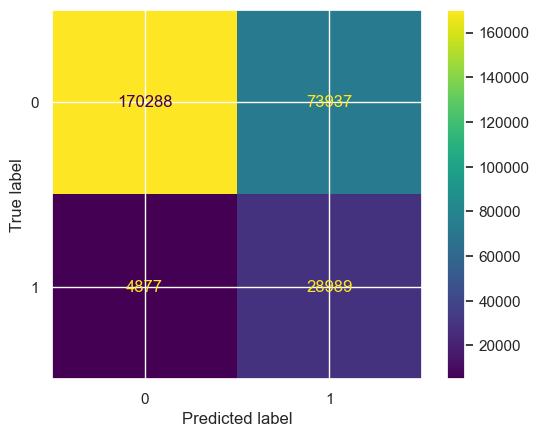

Confusion matrix on the test data 



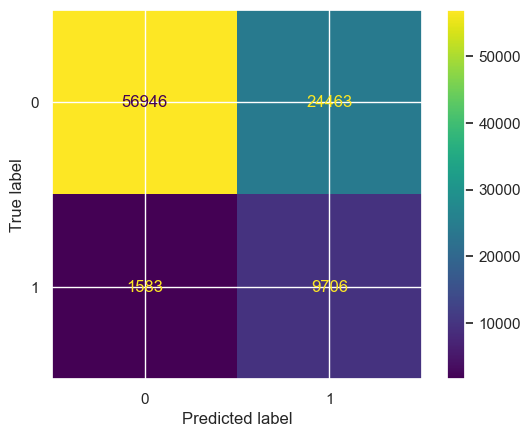

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_gnb.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_gnb.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_gnb.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_gnb.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_gnb.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_gnb.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.821
AUC for the Test Data: 0.824


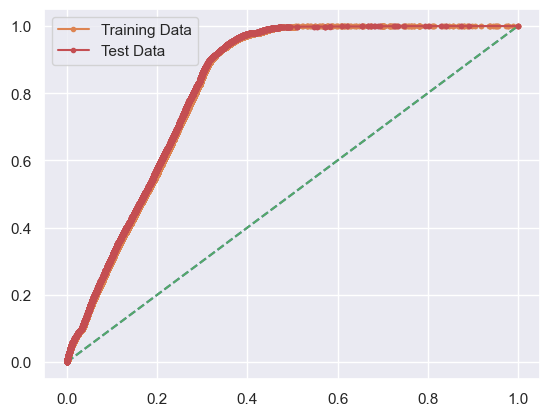

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_gnb.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_gnb.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_gnb.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_gnb.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

After hyperparameter tuning the result is same.

**Resampling**

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid
param_grid = {
    'var_smoothing': uniform(1e-9, 1e-7)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gnb, param_distributions=param_grid,
                                   n_iter=10, n_jobs=-1, cv=5, verbose=3,
                                   random_state=123, scoring='recall')

# Perform RandomizedSearchCV on resampled data
random_search_gnb = random_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print(random_search_gnb.best_params_,'\n')
print(random_search_gnb.best_estimator_,'\n')
print(random_search_gnb.best_score_,'\n')

best_model_gnbs = random_search_gnb.best_estimator_

ytrain_predict = best_model_gnbs.predict(X_train)
ytest_predict = best_model_gnbs.predict(X_test)

{'var_smoothing': 7.064691855978616e-08} 

GaussianNB(var_smoothing=7.064691855978616e-08) 

0.9770907974204116 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      0.59      0.74    244225
           1       0.25      0.98      0.40     33866

    accuracy                           0.64    278091
   macro avg       0.62      0.78      0.57    278091
weighted avg       0.90      0.64      0.70    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.60      0.75     81409
           1       0.25      0.98      0.40     11289

    accuracy                           0.64     92698
   macro avg       0.62      0.79      0.57     92698
weighted avg       0.90      0.64      0.70     92698
 

Confusion matrix on the training data 



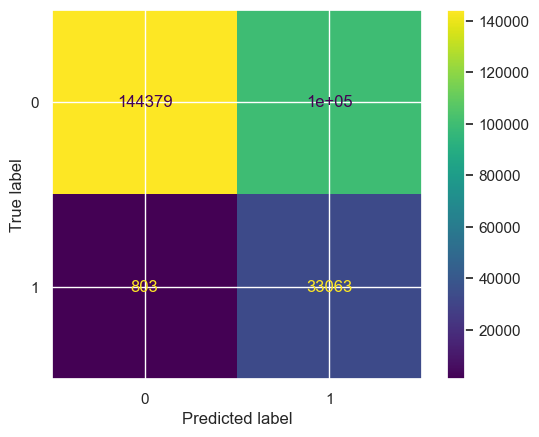

Confusion matrix on the test data 



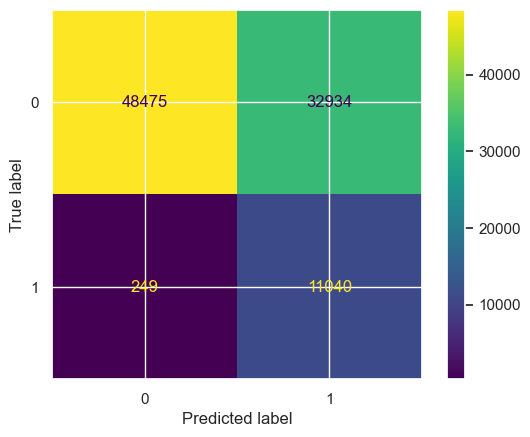

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_gnbs.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_gnbs.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_gnbs.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_gnbs.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_gnbs.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_gnbs.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.822
AUC for the Test Data: 0.825


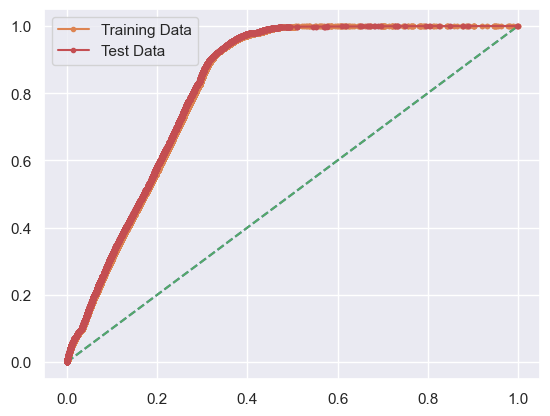

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_gnbs.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_gnbs.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_gnbs.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_gnbs.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

After Resampling the recall score has been incresed.

##### **LIGHT GBM**

In [ ]:
# Initialize the LGBMClassifier
clf = lgb.LGBMClassifier(random_state=1206, n_jobs=-1)

# Train the model
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 33866, number of negative: 244225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 278091, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121780 -> initscore=-1.975678
[LightGBM] [Info] Start training from score -1.975678


LGBMClassifier(n_jobs=-1, random_state=1206)

In [ ]:
# Make predictions on the training and test sets
ytrain_pred = clf.predict(X_train)
ytest_pred = clf.predict(X_test)

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94    244225
           1       0.72      0.01      0.01     33866

    accuracy                           0.88    278091
   macro avg       0.80      0.50      0.47    278091
weighted avg       0.86      0.88      0.82    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     81409
           1       0.32      0.00      0.01     11289

    accuracy                           0.88     92698
   macro avg       0.60      0.50      0.47     92698
weighted avg       0.81      0.88      0.82     92698
 

Confusion matrix on the training data 



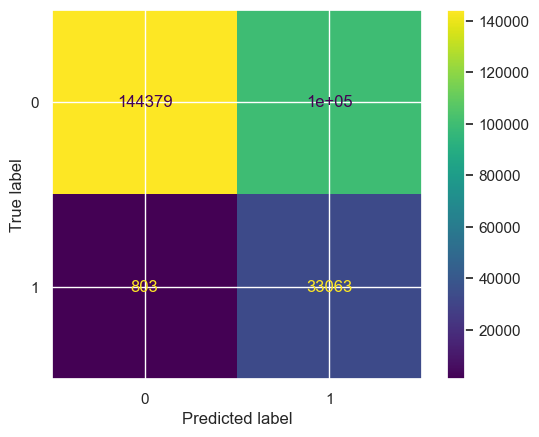

Confusion matrix on the test data 



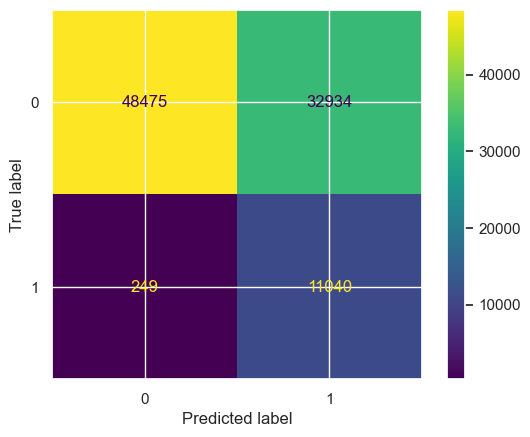

In [ ]:
# Print classification report for training data
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, clf.predict(X_train)),'\n')

# Print classification report for test data
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, clf.predict(X_test)),'\n')


# Confusion matrix for training data
print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=clf.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf.classes_)
disp1.plot()

plt.show()


# Confusion matrix for test data
print('Confusion matrix on the test data', '\n')
cm2 = confusion_matrix(y_test, ytest_predict, labels=clf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.863
AUC for the Test Data: 0.859


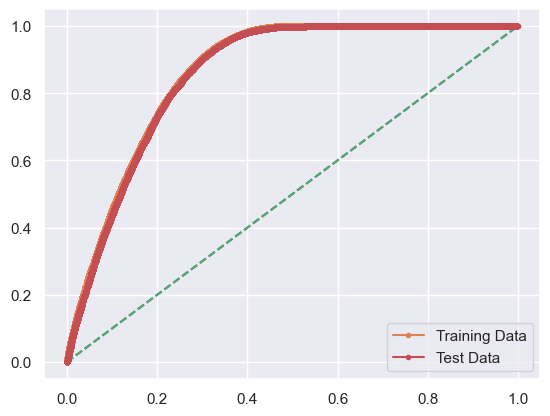

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,clf.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,clf.predict_proba(X_train)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,clf.predict_proba(X_test)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

The Light GBM model is performing well for class 0 on both training and testing dataset, But for class 1 it is not performing well for both the datasets.

The model is fitting well with the dataset.

**Hyperparameter Tuning For Light GBM**

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'num_leaves': [20, 30, 40, 50],
    'min_child_samples': [10, 20, 30],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid,
                                   n_iter=10, n_jobs=-1, cv=5, verbose=3,
                                   random_state=123, scoring='recall')

# Perform RandomizedSearchCV
random_search_lgbm = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 33866, number of negative: 244225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 278091, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121780 -> initscore=-1.975678
[LightGBM] [Info] Start training from score -1.975678


In [ ]:
print(random_search_lgbm.best_params_,'\n')
print(random_search_lgbm.best_estimator_,'\n')
print(random_search_lgbm.best_score_,'\n')

best_model_lbgm = random_search_lgbm.best_estimator_

ytrain_predict = best_model_lbgm.predict(X_train)
ytest_predict = best_model_lbgm.predict(X_test)

{'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.1, 'num_leaves': 50, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': 12, 'learning_rate': 0.2, 'colsample_bytree': 1.0} 

LGBMClassifier(learning_rate=0.2, max_depth=12, n_jobs=-1, num_leaves=50,
               random_state=1206, reg_alpha=0.1, reg_lambda=2, subsample=0.6) 

0.02385873135708653 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94    244225
           1       0.75      0.03      0.06     33866

    accuracy                           0.88    278091
   macro avg       0.82      0.52      0.50    278091
weighted avg       0.87      0.88      0.83    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     81409
           1       0.47      0.02      0.04     11289

    accuracy                           0.88     92698
   macro avg       0.67      0.51      0.49     92698
weighted avg       0.83      0.88      0.83     92698
 

Confusion matrix on the training data 



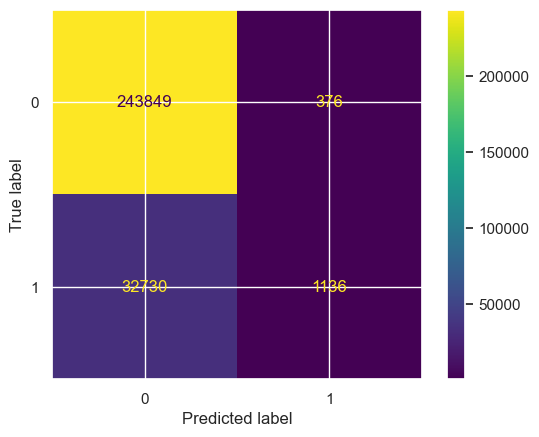

Confusion matrix on the test data 



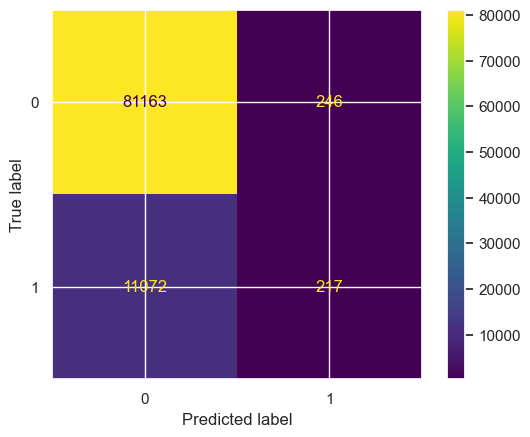

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_lbgm.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_lbgm.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_lbgm.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_lbgm.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_lbgm.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_lbgm.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.879
AUC for the Test Data: 0.860


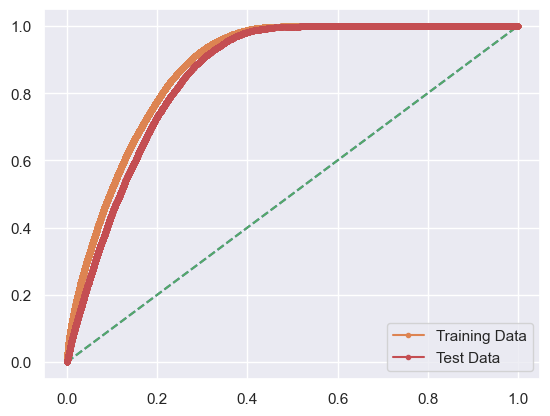

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_lbgm.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_lbgm.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_lbgm.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_lbgm.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

After the hyperparameter tuning not much performance increase in the model.

**Resampling**

In [ ]:
# Define the parameter grid
param_dist = {
    'max_depth': sp_randint(5, 15),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': sp_randint(50, 200),
    'num_leaves': sp_randint(20, 50),
    'min_child_samples': sp_randint(10, 30),
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5, 10],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize LightGBM classifier
#clf = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist,
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV on resampled data
random_search_lgbms = random_search.fit(X_train_resampled, y_train_resampled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 244225, number of negative: 244225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 488450, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
print(random_search_lgbms.best_params_,'\n')
print(random_search_lgbms.best_estimator_,'\n')
print(random_search_lgbms.best_score_,'\n')

best_model_lbgms = random_search_lgbms.best_estimator_

ytrain_predict = best_model_lbgms.predict(X_train)
ytest_predict = best_model_lbgms.predict(X_test)

{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 12, 'min_child_samples': 12, 'n_estimators': 199, 'num_leaves': 40, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.7} 

LGBMClassifier(learning_rate=0.2, max_depth=12, min_child_samples=12,
               n_estimators=199, n_jobs=-1, num_leaves=40, random_state=1206,
               reg_alpha=0.1, reg_lambda=1, subsample=0.7) 

0.8827966014945234 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.91      0.93      0.92    244225
           1       0.41      0.34      0.37     33866

    accuracy                           0.86    278091
   macro avg       0.66      0.64      0.65    278091
weighted avg       0.85      0.86      0.85    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.93      0.92     81409
           1       0.37      0.30      0.33     11289

    accuracy                           0.85     92698
   macro avg       0.64      0.62      0.63     92698
weighted avg       0.84      0.85      0.85     92698
 

Confusion matrix on the training data 



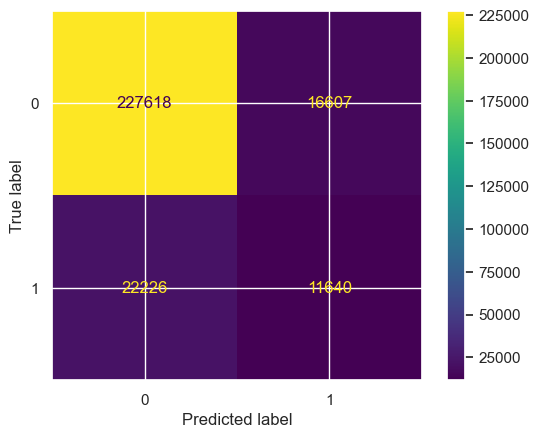

Confusion matrix on the test data 



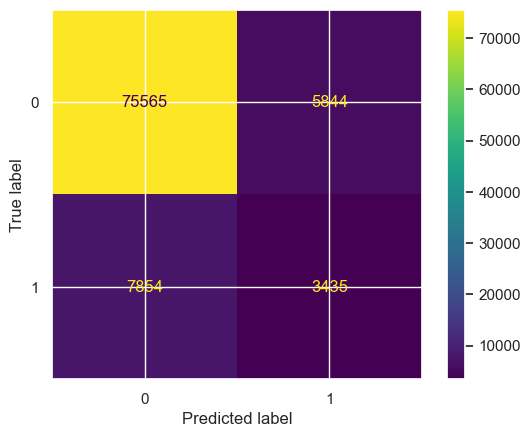

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_lbgms.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_lbgms.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_lbgms.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_lbgms.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_lbgms.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_lbgms.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.868
AUC for the Test Data: 0.850


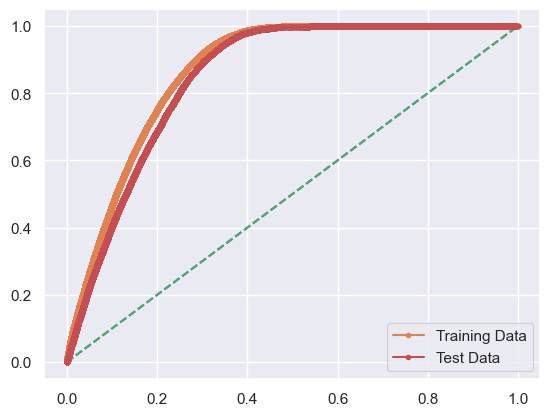

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_lbgms.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_lbgms.predict_proba(X_train)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_lbgms.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_lbgms.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Aftre resampling the precision, recall, and f1-score has been incresed in class 1. But this model is not performing well for the dataset.

##### **Logistic Regression**

In [ ]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the training and test sets
ytrain_predict = logreg.predict(X_train)
ytest_predict = logreg.predict(X_test)

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94    244225
           1       0.00      0.00      0.00     33866

    accuracy                           0.88    278091
   macro avg       0.44      0.50      0.47    278091
weighted avg       0.77      0.88      0.82    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94     81409
           1       0.00      0.00      0.00     11289

    accuracy                           0.88     92698
   macro avg       0.44      0.50      0.47     92698
weighted avg       0.77      0.88      0.82     92698
 

Confusion matrix on the training data 



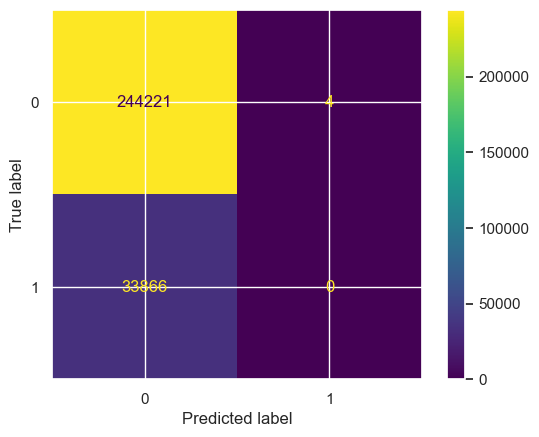

Confusion matrix on the test data 



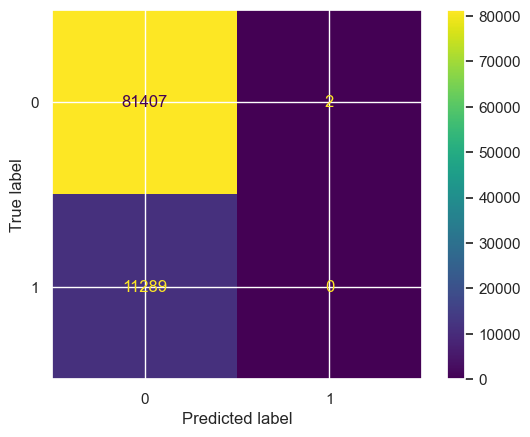

In [ ]:
# Print classification report for training data
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, logreg.predict(X_train)),'\n')

# Print classification report for test data
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, logreg.predict(X_test)),'\n')


# Confusion matrix for training data
print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=logreg.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=logreg.classes_)
disp1.plot()

plt.show()

# Confusion matrix for test data
print('Confusion matrix on the test data', '\n')
cm2 = confusion_matrix(y_test, ytest_predict, labels=logreg.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=logreg.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.837
AUC for the Test Data: 0.838


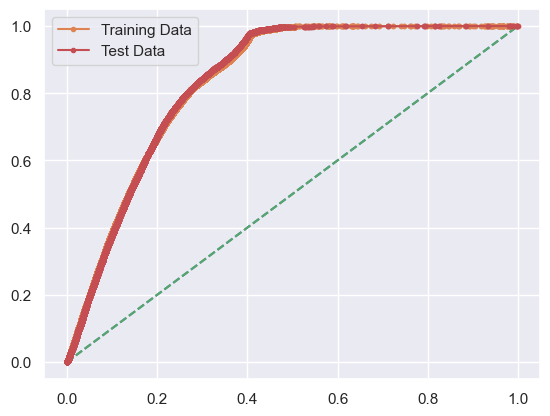

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,logreg.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,logreg.predict_proba(X_train)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,logreg.predict_proba(X_test)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

The Logistic regression model is not at all performing well for the class 1 in both training and testing dataset. this model is giving 0 for precision, recall, and f1-score for both datasets.

**Hyperparameter Tuning For Logistic Regression**

In [ ]:
from scipy.stats import uniform
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(0.01, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid,
                                   n_iter=10, n_jobs=-1, cv=5, verbose=3,
                                   random_state=123, scoring='recall')

# Perform RandomizedSearchCV
random_search_lr = random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print(random_search_lr.best_params_,'\n')
print(random_search_lr.best_estimator_,'\n')
print(random_search_lr.best_score_,'\n')

best_model_lr = random_search_lr.best_estimator_

ytrain_predict = best_model_lr.predict(X_train)
ytest_predict = best_model_lr.predict(X_test)

{'C': 4.241064601244609, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'} 

LogisticRegression(C=4.241064601244609, max_iter=300, solver='newton-cg') 

0.0 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94    244225
           1       0.00      0.00      0.00     33866

    accuracy                           0.88    278091
   macro avg       0.44      0.50      0.47    278091
weighted avg       0.77      0.88      0.82    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94     81409
           1       0.00      0.00      0.00     11289

    accuracy                           0.88     92698
   macro avg       0.44      0.50      0.47     92698
weighted avg       0.77      0.88      0.82     92698
 

Confusion matrix on the training data 



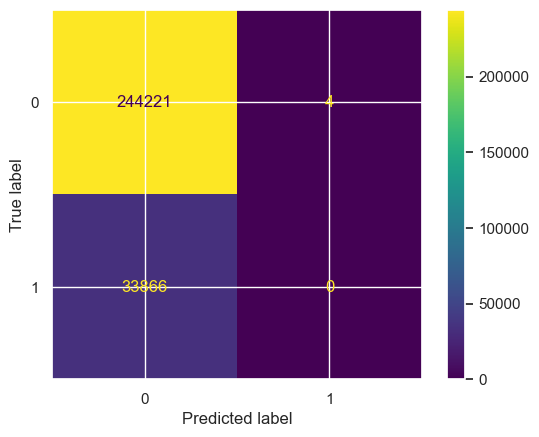

Confusion matrix on the test data 



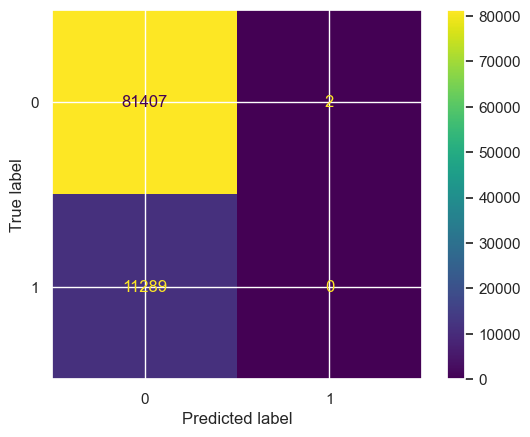

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_lr.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_lr.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_lr.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_lr.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_lr.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_lr.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.837
AUC for the Test Data: 0.838


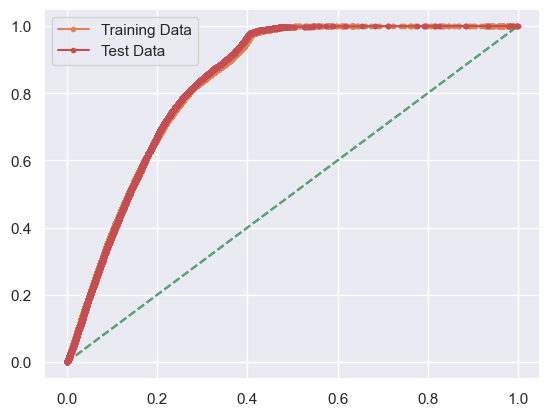

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_lr.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_lr.predict_proba(X_train)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_lr.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_lr.predict_proba(X_test)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

After hyper paarmeter tuning there is no performance increase for the class 1 in both the datasets.

**Resampling**

In [ ]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(0.01, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500]
}

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid,
                                   n_iter=10, n_jobs=-1, cv=5, verbose=3,
                                   random_state=123, scoring='recall')

# Perform RandomizedSearchCV on resampled data
random_search_lrs = random_search.fit(X_train_resampled, y_train_resampled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print(random_search.best_params_,'\n')
print(random_search.best_estimator_,'\n')
print(random_search.best_score_,'\n')

best_model_lrs = random_search_lrs.best_estimator_

ytrain_predict = best_model_lrs.predict(X_train)
ytest_predict = best_model_lrs.predict(X_test)

{'C': 2.987804977404459, 'max_iter': 500, 'penalty': 'l2', 'solver': 'sag'} 

LogisticRegression(C=2.987804977404459, max_iter=500, solver='sag') 

0.9732951172074932 



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      0.59      0.74    244225
           1       0.25      0.97      0.40     33866

    accuracy                           0.64    278091
   macro avg       0.62      0.78      0.57    278091
weighted avg       0.90      0.64      0.70    278091
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.60      0.75     81409
           1       0.25      0.97      0.40     11289

    accuracy                           0.64     92698
   macro avg       0.62      0.79      0.57     92698
weighted avg       0.90      0.64      0.70     92698
 

Confusion matrix on the training data 



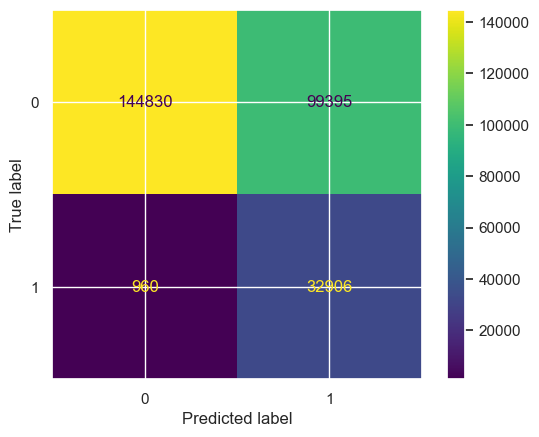

Confusion matrix on the test data 



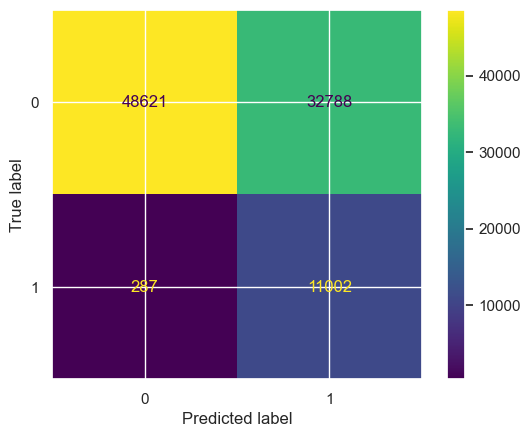

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, best_model_lrs.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, best_model_lrs.predict(X_test)),'\n')


print('Confusion matrix on the training data', '\n')
cm1 = confusion_matrix(y_train, ytrain_predict, labels=best_model_lrs.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=best_model_lrs.classes_)
disp1.plot()

plt.show()

print('Confusion matrix on the test data', '\n')

cm2 = confusion_matrix(y_test, ytest_predict, labels=best_model_lrs.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_model_lrs.classes_)
disp2.plot()

plt.show()

AUC for the Training Data: 0.836
AUC for the Test Data: 0.837


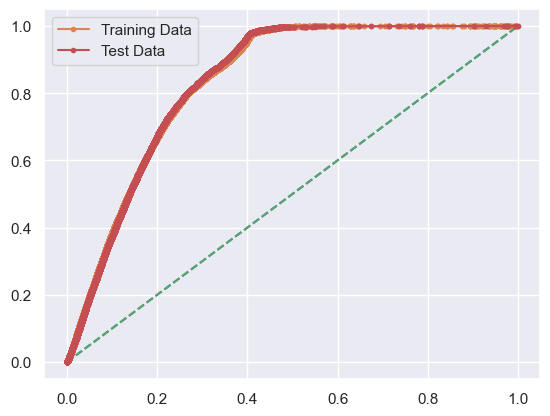

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,best_model_lrs.predict_proba(X_train)[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,best_model_lrs.predict_proba(X_train)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,best_model_lrs.predict_proba(X_test)[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_model_lrs.predict_proba(X_test)[:,1], pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

After resampling the precision, recall, f1-score has been increased for both training and testing dataset.

And the model is well fiited for the dataset.

#### **Conclusion**

The dataset given is highly imabalanced. As for class 0 in training data, the data available are 244225, and for class 1 is 33866. In testing data, the data available for class 0 is 33866, and for class 1 is 11289. Because the data available for class 1 is insufficient so the models are not able to predict correctly. But the data available for class 0 is more so the moders are able to prodect correctly for the class 0.

Out of all the models(Random forest, XG Boost, Gaussian naive bayes, LightGBM, Logistic regression) we have used, The XGBoost is giving a more generalized model because the train test data and both auc and roc curve are same means there are no overfitting. The other models are having overfitting and underfitting.

The XGBoost model have High precision for class 0 (negative class) indicates that it correctly identifies most actual negative instances, and the overall accuracy is at 0.88. But It have Low recall for class 1 (positive class) suggests that the model misses many actual positive instances. And F1-score for class 1 is also low (0.10 in training data, 0.06 in test data).

The Gaussian Naive Bayes Model have High recall for class 1 indicates that it correctly identifies most actual positive instances. and the overall accuracy is 0.72. But Low precision for class 1 (many false positives) due to the trade-off with recall. And the F1-score for class 1 is moderate (0.42 in training data, 0.43 in test data).

In summary, XGBoost provides better precision for class 1, while GaussianNB achieves higher recall.The choice between the two models depends on the business context and the trade-off between precision and recall.

- If minimizing false negatives (catching all positive instances) is critical, GaussianNB is suitable.
- If precision (reducing false positives) is more important, XGBoost is suitable.

